<a href="https://colab.research.google.com/github/helendc/COMP488_Assignment3/blob/main/488_Spring2021_Section003_TeamNu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **COMP488.003 Team Nu Assignment 3: Harris Teeter Twitter Analysis**

- **Members**: Helen Charbonnet, Peter Shelley, Niazi Nurataj, Ellen Wang, Jeong Ho Park, Abhinav Gadudasu

Project Breakdown: 
- We chose **Harris Teeter** (HT) as our major B2C firm
- The closet competitors: 
  - Walmart (Wal)
  - Trader Joe's (TJ)
  - Whole Foods (WF)
  
- Sentiment Analysis on each companies tweets
- Tokenization of each companies tweets
- Word Vector Analysis of each companies tweets
- Multidimensional sentiment analysis on specific topics 
- Comparison of these results across companies

#Imports

In [ ]:
import pandas as pd
import itertools

!pip3 install -U emoji
import emoji
import regex
import re

!pip3 install vaderSentiment
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import matplotlib.pyplot as plt
import seaborn as sns
import math

!pip3 install tweet-preprocessor
import preprocessor as prepro

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

from sklearn.decomposition import PCA
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

from wordcloud import WordCloud
import spacy
import string
nlp = spacy.load('en')

# Download the Google pretrained Word2Vec Model
!wget "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"
EMBEDDING_FILE = 'GoogleNews-vectors-negative300.bin.gz'
google_word2vec = KeyedVectors.load_word2vec_format(EMBEDDING_FILE, binary=True)

Requirement already up-to-date: emoji in /usr/local/lib/python3.7/dist-packages (1.2.0)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
--2021-05-02 23:11:31--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.104.134
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.104.134|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz.2’

GoogleNews-vectors- 100%[===================>]   1.53G  85.5MB/s    in 18s     

2021-05-02 23:11:48 (88.2 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz.2’ saved [1647046227/1647046227]



# Scraping Tweets


- This code was run locally to download our tweets as json files
- We then uploaded the data into Google Colab to work here
- We provided the code we ran locally, but commented it out as it is unnecesary to run in this notebook

In [ ]:
#!pip3 install git+https://github.com/JustAnotherArchivist/snscrape.git

In [ ]:
# # Scrape HT Tweets
# !snscrape --jsonl --progress --max-results 1000 twitter-search "'harris teeter' OR 'Harris Teeter' OR 'Harris teeter' OR 'harris Teeter' OR 'harrisTeeter' OR 'Harristeeter' OR 'HarrisTeeter' OR 'harristeeter' lang:en since:2021-01-01" > beg_jan.json
# !snscrape --jsonl --progress --max-results 1000 twitter-search "'harris teeter' OR 'Harris Teeter' OR 'Harris teeter' OR 'harris Teeter' OR 'harrisTeeter' OR 'Harristeeter' OR 'HarrisTeeter' OR 'harristeeter' lang:en until:2021-01-31" > end_jan.json
# !snscrape --jsonl --progress --max-results 1000 twitter-search "'harris teeter' OR 'Harris Teeter' OR 'Harris teeter' OR 'harris Teeter' OR 'harrisTeeter' OR 'Harristeeter' OR 'HarrisTeeter' OR 'harristeeter' lang:en since:2021-02-01" > beg_feb.json
# !snscrape --jsonl --progress --max-results 1000 twitter-search "'harris teeter' OR 'Harris Teeter' OR 'Harris teeter' OR 'harris Teeter' OR 'harrisTeeter' OR 'Harristeeter' OR 'HarrisTeeter' OR 'harristeeter' lang:en until:2021-02-28" > end_feb.json
# !snscrape --jsonl --progress --max-results 1000 twitter-search "'harris teeter' OR 'Harris Teeter' OR 'Harris teeter' OR 'harris Teeter' OR 'harrisTeeter' OR 'Harristeeter' OR 'HarrisTeeter' OR 'harristeeter' lang:en since:2021-03-01" > beg_mar.json
# !snscrape --jsonl --progress --max-results 1000 twitter-search "'harris teeter' OR 'Harris Teeter' OR 'Harris teeter' OR 'harris Teeter' OR 'harrisTeeter' OR 'Harristeeter' OR 'HarrisTeeter' OR 'harristeeter' lang:en until:2021-03-31" > end_mar.json
# !snscrape --jsonl --progress --max-results 1000 twitter-search "'harris teeter' OR 'Harris Teeter' OR 'Harris teeter' OR 'harris Teeter' OR 'harrisTeeter' OR 'Harristeeter' OR 'HarrisTeeter' OR 'harristeeter' lang:en since:2021-04-01" > beg_apr.json
# !snscrape --jsonl --progress --max-results 1000 twitter-search "'harris teeter' OR 'Harris Teeter' OR 'Harris teeter' OR 'harris Teeter' OR 'harrisTeeter' OR 'Harristeeter' OR 'HarrisTeeter' OR 'harristeeter' lang:en until:2021-04-29" > end_apr.json

In [ ]:
# # Scrape TJ Tweets
# !snscrape --jsonl --progress --max-results 1000 twitter-search "'Trader Joes' OR 'trader joes' OR 'Trader joes' OR 'trader Joes' OR 'TraderJoes' OR 'traderjoes' OR 'traderJoes' OR 'Traderjoes' lang:en since:2021-01-01" > beg_jan.json
# !snscrape --jsonl --progress --max-results 1000 twitter-search "'Trader Joes' OR 'trader joes' OR 'Trader joes' OR 'trader Joes' OR 'TraderJoes' OR 'traderjoes' OR 'traderJoes' OR 'Traderjoes' lang:en until:2021-01-31" > end_jan.json
# !snscrape --jsonl --progress --max-results 1000 twitter-search "'Trader Joes' OR 'trader joes' OR 'Trader joes' OR 'trader Joes' OR 'TraderJoes' OR 'traderjoes' OR 'traderJoes' OR 'Traderjoes' lang:en since:2021-02-01" > beg_feb.json
# !snscrape --jsonl --progress --max-results 1000 twitter-search "'Trader Joes' OR 'trader joes' OR 'Trader joes' OR 'trader Joes' OR 'TraderJoes' OR 'traderjoes' OR 'traderJoes' OR 'Traderjoes' lang:en until:2021-02-28" > end_feb.json
# !snscrape --jsonl --progress --max-results 1000 twitter-search "'Trader Joes' OR 'trader joes' OR 'Trader joes' OR 'trader Joes' OR 'TraderJoes' OR 'traderjoes' OR 'traderJoes' OR 'Traderjoes' lang:en since:2021-03-01" > beg_mar.json
# !snscrape --jsonl --progress --max-results 1000 twitter-search "'Trader Joes' OR 'trader joes' OR 'Trader joes' OR 'trader Joes' OR 'TraderJoes' OR 'traderjoes' OR 'traderJoes' OR 'Traderjoes' lang:en until:2021-03-31" > end_mar.json
# !snscrape --jsonl --progress --max-results 1000 twitter-search "'Trader Joes' OR 'trader joes' OR 'Trader joes' OR 'trader Joes' OR 'TraderJoes' OR 'traderjoes' OR 'traderJoes' OR 'Traderjoes' lang:en since:2021-04-01" > beg_apr.json
# !snscrape --jsonl --progress --max-results 1000 twitter-search "'Trader Joes' OR 'trader joes' OR 'Trader joes' OR 'trader Joes' OR 'TraderJoes' OR 'traderjoes' OR 'traderJoes' OR 'Traderjoes' lang:en until:2021-04-29" > end_apr.json

In [ ]:
# # Scrape Walmart Tweets
# !snscrape --jsonl --progress --max-results 1000 twitter-search "'walmart' OR 'Walmart' OR 'wallmart' OR 'Wallmart' lang:en since:2021-01-01" > beg_jan.json
# !snscrape --jsonl --progress --max-results 1000 twitter-search "'walmart' OR 'Walmart' OR 'wallmart' OR 'Wallmart' lang:en until:2021-01-31" > end_jan.json
# !snscrape --jsonl --progress --max-results 1000 twitter-search "'walmart' OR 'Walmart' OR 'wallmart' OR 'Wallmart' lang:en since:2021-02-01" > beg_feb.json
# !snscrape --jsonl --progress --max-results 1000 twitter-search "'walmart' OR 'Walmart' OR 'wallmart' OR 'Wallmart' lang:en until:2021-02-28" > end_feb.json
# !snscrape --jsonl --progress --max-results 1000 twitter-search "'walmart' OR 'Walmart' OR 'wallmart' OR 'Wallmart' lang:en since:2021-03-01" > beg_mar.json
# !snscrape --jsonl --progress --max-results 1000 twitter-search "'walmart' OR 'Walmart' OR 'wallmart' OR 'Wallmart' lang:en until:2021-03-31" > end_mar.json
# !snscrape --jsonl --progress --max-results 1000 twitter-search "'walmart' OR 'Walmart' OR 'wallmart' OR 'Wallmart' lang:en since:2021-04-01" > beg_apr.json
# !snscrape --jsonl --progress --max-results 1000 twitter-search "'walmart' OR 'Walmart' OR 'wallmart' OR 'Wallmart' lang:en until:2021-04-29" > end_apr.json

In [ ]:
# # Scrape Whole Foods Tweeets
# !snscrape --jsonl --progress --max-results 1000 twitter-search "'Whole Foods' OR 'whole foods' OR 'Whole foods' OR 'whole Foods' OR 'WholeFoods' OR 'wholefoods' OR 'wholeFoods' OR 'Wholefoods' lang:en since:2021-01-01" > beg_jan.json
# !snscrape --jsonl --progress --max-results 1000 twitter-search "'Whole Foods' OR 'whole foods' OR 'Whole foods' OR 'whole Foods' OR 'WholeFoods' OR 'wholefoods' OR 'wholeFoods' OR 'Wholefoods' lang:en until:2021-01-31" > end_jan.json
# !snscrape --jsonl --progress --max-results 1000 twitter-search "'Whole Foods' OR 'whole foods' OR 'Whole foods' OR 'whole Foods' OR 'WholeFoods' OR 'wholefoods' OR 'wholeFoods' OR 'Wholefoods' lang:en since:2021-02-01" > beg_feb.json
# !snscrape --jsonl --progress --max-results 1000 twitter-search "'Whole Foods' OR 'whole foods' OR 'Whole foods' OR 'whole Foods' OR 'WholeFoods' OR 'wholefoods' OR 'wholeFoods' OR 'Wholefoods' lang:en until:2021-02-28" > end_feb.json
# !snscrape --jsonl --progress --max-results 1000 twitter-search "'Whole Foods' OR 'whole foods' OR 'Whole foods' OR 'whole Foods' OR 'WholeFoods' OR 'wholefoods' OR 'wholeFoods' OR 'Wholefoods' lang:en since:2021-03-01" > beg_mar.json
# !snscrape --jsonl --progress --max-results 1000 twitter-search "'Whole Foods' OR 'whole foods' OR 'Whole foods' OR 'whole Foods' OR 'WholeFoods' OR 'wholefoods' OR 'wholeFoods' OR 'Wholefoods' lang:en until:2021-03-31" > end_mar.json
# !snscrape --jsonl --progress --max-results 1000 twitter-search "'Whole Foods' OR 'whole foods' OR 'Whole foods' OR 'whole Foods' OR 'WholeFoods' OR 'wholefoods' OR 'wholeFoods' OR 'Wholefoods' lang:en since:2021-04-01" > beg_apr.json
# !snscrape --jsonl --progress --max-results 1000 twitter-search "'Whole Foods' OR 'whole foods' OR 'Whole foods' OR 'whole Foods' OR 'WholeFoods' OR 'wholefoods' OR 'wholeFoods' OR 'Wholefoods' lang:en until:2021-04-29" > end_apr.json

# Creating Datafranes

Each company has its own json file that we save to separate dataframes

In [ ]:
ht_df = pd.read_json('HarrisTeeterTweets.json', lines=True)
wal_df = pd.read_json('WalmartTweets.json', lines=True)
tj_df = pd.read_json('TraderJoesTweets.json', lines=True)
wf_df = pd.read_json('WholeFoodsTweets.json', lines=True)

Remove Unnecesary Columns 

In [ ]:
ht_df = ht_df[['id','date', 'content']]
wal_df = wal_df[['id','date', 'content']]
tj_df = tj_df[['id','date', 'content']]
wf_df = wf_df[['id','date', 'content']]

display(ht_df.head(5))
display(wal_df.head(5))
display(tj_df.head(5))
display(wf_df.head(5))

,id,date,content
0,1388935227515580420,2021-05-02 19:15:38+00:00,Publix is cool.. but y’all boys ever herd of Harris Teeter ?
1,1388933673970450434,2021-05-02 19:09:27+00:00,Some guy was like “ya let’s go with Harris teeter” and everyone really was like “ok”
2,1388932485900288003,2021-05-02 19:04:44+00:00,"Harris Teeter continues to support service members and military families. Shop at your local @HarrisTeeter and ""Round-Up"" your shopping total to the nearest $. Funds from this campaign will support USO Service member and family programs. #HTRoundUp #SupportOurTroops #uso https://t.co/PrTel7oj7K"
3,1388932016293490689,2021-05-02 19:02:52+00:00,"even if Harris teeter is named after a person, I feel like there were a lot of other options of grocery store names that didn’t involve the sound “teet” idk maybe it’s just me ?"
4,1388930677073121283,2021-05-02 18:57:33+00:00,@DjMoeezy @iRsconnor Kroger. Food lion. Publix? Harris Teeter? First two for sure when in season. Moondrops the best kind.


,id,date,content
0,1388939379817787393,2021-05-02 19:32:08+00:00,@HUUTAOIE //go ahead ig lets just forget abt the fact that my eula was your mother for some time LMASDOQKGQWKDQWGLQW
1,1388939305641517059,2021-05-02 19:31:50+00:00,Wtf are the chances I just seen this mans at Walmart 😂
2,1388939300042051585,2021-05-02 19:31:49+00:00,Me trynna get myself up to go to walmart like https://t.co/pG5RIySPuD
3,1388939281151008772,2021-05-02 19:31:44+00:00,@NCLeanne @rockclimber03 @Walmart That's the exact reason America is having such a hard time getting out of this mess we are in.
4,1388939244479991808,2021-05-02 19:31:35+00:00,"@4thViv @piyushmittal @PattiUSBLUE true, but what up with sinema? manchin is owned by coal and walmart (w. virginia's largest employer)."


,id,date,content
0,1388941094507929602,2021-05-02 19:38:56+00:00,@MaggieMartin_ I miss that trader joes one that one was good😂
1,1388940044422062080,2021-05-02 19:34:46+00:00,i'm sad there instead a trader joes in the city 😔
2,1388939149432999939,2021-05-02 19:31:13+00:00,What are country flags if not pride flags https://t.co/4VBuRheTsu
3,1388938684976615424,2021-05-02 19:29:22+00:00,Me at instacart headquarters because they don’t deliver Trader Joes https://t.co/bGuh8kMbnU
4,1388938343136862216,2021-05-02 19:28:00+00:00,@ICP_Jagd But Terry Crews is everyone's favorite black person


,id,date,content
0,1389005354227404800,2021-05-02 23:54:17+00:00,@nitterwatchestv I’ve never done one longer than 5 days either. Not that strong. 🤣 pandemic was rough. Ate/drank my feelings. However since Jan I’ve cut out most processed foods. Try to eat Whole Foods &amp; that alone has made me feel so much better.
1,1389005315497136130,2021-05-02 23:54:08+00:00,"Douche of the weekend recipients: TFowl, the person who hit Drew’s car, my dad, the cashier at Whole Foods, the Karen who yelled at me for bumping Atliens, and once again TFowl"
2,1389005256932134913,2021-05-02 23:53:54+00:00,@kissubie @SicK_cs Those eggos really don’t fit in with the rest of amazon whole foods
3,1389004882942722048,2021-05-02 23:52:25+00:00,@TeslaJoy @Tesla @elonmusk I think it's like $1. And free if you validate at Whole Foods.
4,1389004489886244864,2021-05-02 23:50:51+00:00,"And why exactly can't I put ""once ate an entire tub of Whole Foods 7 layer dip"" on my resume?"


# Preprocessing Tweets

Here, we start our preprocessing by using prepo. We then remove and replace a few more specific things to twitter data that the prepro misses. 

In [ ]:
prepro.set_options(prepro.OPT.URL, prepro.OPT.RESERVED)
def preprocess(df):
  # Using prepro as a start 
  df['stripped']  = df['content'].apply(prepro.clean)

  # Replace html &amp; with and
  df['stripped'] =  [re.sub(r'&amp;', 'and', w) for w in df.stripped]

  # Remove other html entities 
  htmlents = r'|'.join((r'&copy;',r'&reg;',r'&quot;',r'&gt;',r'&lt;',r'&nbsp;',r'&apos;',r'&cent;',r'&euro;',r'&pound;')) 
  df['stripped'] =  [re.sub(htmlents, '', w) for w in df.stripped]

  # Set-up patterns to be removed from the tweets
  htag = r'|'.join((r"#", r"@",r"FAV",r"pic.\S+",r"http\S+",r"\n",'\r\n'))

  # Now, replace the patterns with an empty string
  df['stripped'] =  [re.sub(htag, '', w) for w in df.stripped]

  # Remove double empty spaces
  #df['text']  = [re.sub(r"  ", ' ', w) for w in df.loc[:,'text']]
  df['stripped'] = df.stripped.replace({' +':' '},regex=True)

  # Check our Work
  print(df['stripped'].tail(5))
  
  # Replace content with stripped 
  df.drop(columns=['content'], inplace=True)

# Call on each df 
print("==========Harris Teeter Check=============")
preprocess(ht_df)
print("=========Walmart Check=============")
preprocess(wal_df)
print("=========TJ Check=============")
preprocess(tj_df)
print("=========WF Check=============")
preprocess(wf_df)

==========Harris Teeter Check=============
7995                                                                                                      Update From: Harris Teeter - Hastings Marketplace Manassas, 20110 URL: Apr 09, 3:26 AM
7996    Harris Teeter to host Supplier Diversity Summit May 3-5, 2021 to enhance inclusion efforts and introduce additional diverse supplier products to shelves: Howeice HarrisTeeter Diversity
7997                                                                                                             Update From: Harris Teeter - PENDER VILLAGE Fairfax, 22033 URL: Apr 09, 2:46 AM
7998                                                                                               This white lady in Harris Teeter tried to hide her food stamp card like she was embarrassed 😑
7999                                                                                                              Update From: Harris Teeter - NORTH ROCK Warrenton, 20186 URL: Apr 08, 1

Here, we further pre-process the content of our tweets so that they can be used for tokenization later on in the notebook.
- The "stripped" column will be used for sentiment analysis
- The "cleaned" column will be used for word vector analysis


In [ ]:
def remove_non_ascii(s):
    return "".join(i for i in s if ord(i) < 128)

def make_lower_case(text):
    return text.lower()

def remove_stop_words(text):
    text = text.split()
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text

def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    text = " ".join(text)
    return text

In [ ]:
ht_df['cleaned'] = ht_df['stripped'].astype(str)

ht_df['cleaned'] = ht_df.cleaned.apply(remove_non_ascii)
ht_df['cleaned'] = ht_df.cleaned.apply(make_lower_case)
ht_df['cleaned'] = ht_df.cleaned.apply(remove_stop_words)
ht_df['cleaned'] = ht_df.cleaned.apply(remove_punctuation)
ht_df['cleaned'] = ht_df.cleaned.apply(remove_html)

In [ ]:
wal_df['cleaned'] = wal_df['stripped'].astype(str)

wal_df['cleaned'] = wal_df.cleaned.apply(remove_non_ascii)
wal_df['cleaned'] = wal_df.cleaned.apply(make_lower_case)
wal_df['cleaned'] = wal_df.cleaned.apply(remove_stop_words)
wal_df['cleaned'] = wal_df.cleaned.apply(remove_punctuation)
wal_df['cleaned'] = wal_df.cleaned.apply(remove_html)

In [ ]:
tj_df['cleaned'] = tj_df['stripped'].astype(str)

tj_df['cleaned'] = tj_df.cleaned.apply(remove_non_ascii)
tj_df['cleaned'] = tj_df.cleaned.apply(make_lower_case)
tj_df['cleaned'] = tj_df.cleaned.apply(remove_stop_words)
tj_df['cleaned'] = tj_df.cleaned.apply(remove_punctuation)
tj_df['cleaned'] = tj_df.cleaned.apply(remove_html)

In [ ]:
wf_df['cleaned'] = wf_df['stripped'].astype(str)

wf_df['cleaned'] = wf_df.cleaned.apply(remove_non_ascii)
wf_df['cleaned'] = wf_df.cleaned.apply(make_lower_case)
wf_df['cleaned'] = wf_df.cleaned.apply(remove_stop_words)
wf_df['cleaned'] = wf_df.cleaned.apply(remove_punctuation)
wf_df['cleaned'] = wf_df.cleaned.apply(remove_html)

# Emoji Analysis

Here, we create a column of emojis from the content of our tweets

In [ ]:
# Function that extracts the emojis from a text and returns them in a list
def get_emojis(text):
    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI["en"] for char in word):
            emoji_list.append(word)

    return emoji_list

# Call function and pass it each company's Tweet
ht_df['emojis'] = ht_df['stripped'].apply(get_emojis)
wal_df['emojis'] = wal_df['stripped'].apply(get_emojis)
tj_df['emojis'] = tj_df['stripped'].apply(get_emojis)
wf_df['emojis'] = wf_df['stripped'].apply(get_emojis)

# Check our work
display(ht_df.iloc[340:352,:]) # logical indexing: from tweets get rows 340,352
display(wal_df.iloc[340:352,:]) # logical indexing: from tweets get rows 340,352
display(tj_df.iloc[340:352,:]) # logical indexing: from tweets get rows 340,352
display(wf_df.iloc[340:352,:]) # logical indexing: from tweets get rows 340,352


,id,date,stripped,cleaned,emojis
340,1386730934289014791,2021-04-26 17:16:33+00:00,"caniac315 Babes I live downtown. Where is the nearest Walmart to Fayetteville street? Publix may have cheaper fresh produce, but over all, doesn’t have the same products available. Target a bit closer, but it’s small second story on states campus. There’s Harris teeter, not great options",caniac315 babes live downtown nearest walmart fayetteville street publix may cheaper fresh produce all doesnt products available target bit closer small second story states campus theres harris teeter great options,[]
341,1386721395061792770,2021-04-26 16:38:39+00:00,"smhigg lacroixwater Apologies to Peach Pear and Apricot (which I can never find anyway), but this is my new favorite. I got it at Harris Teeter.",smhigg lacroixwater apologies peach pear apricot which never find anyway new favorite got harris teeter,[]
342,1386717741227388928,2021-04-26 16:24:08+00:00,cameltoooee axcomrade My first 5 months at Harris Teeter I was only a cashier and people really don’t understand that standing is a different type of standing 🥴😂,cameltoooee axcomrade first 5 months harris teeter cashier people really dont understand standing different type standing,"[🥴, 😂]"
343,1386709046011604994,2021-04-26 15:49:35+00:00,Literally just got some BOGO turkey hot dogs at harris teeter 🤣 and was hyped when I saw the deal,literally got bogo turkey hot dogs harris teeter hyped saw deal,[🤣]
344,1386706677400023041,2021-04-26 15:40:10+00:00,"This view may currently be available. Contact a Keller Williams Realty, Amelia Island agent for more info. 904.261.9800. 4800 1st Coast Hwy, 230, Amelia Island, FL in the Harris Teeter Shopping Center.",view may currently available contact keller williams realty amelia island agent info 904 261 9800 4800 1st coast hwy 230 amelia island fl harris teeter shopping center,[]
345,1386699839489073155,2021-04-26 15:13:00+00:00,"I walk into (Wegman's, Harris Teeter, Whole Foods, Giant, etc...) at 5:30pm, a rotisserie chicken and walk out the door at 5:40pm. Home at 6pm eating chicken and that is EXACTLY HOW I LIKE IT! LOL!",walk wegman s harris teeter whole foods giant etc 5 30pm rotisserie chicken walk door 5 40pm home 6pm eating chicken exactly like it lol,[]
346,1386695092396863495,2021-04-26 14:54:08+00:00,Save at both the register and the Gas Pump when you visit HarrisTeeter. You can support our military service members and their families by Rounding Up to the nearest whole dollar at checkout in all Harris Teeter stores. HTRoundUp SupportOurTroops uso,save register gas pump visit harristeeter support military service members families rounding nearest whole dollar checkout harris teeter stores htroundup supportourtroops uso,[]
347,1386676174789689345,2021-04-26 13:38:57+00:00,I knew Harris teeter owed me a check. It’s been like 7 months since I quit lmao. I hate them frfr,knew harris teeter owed check like 7 months since quit lmao hate frfr,[]
348,1386608466291265540,2021-04-26 09:09:54+00:00,I lowkey miss pushing carts at 10:30 at night at Harris teeter and the store is basically dead after 8,lowkey miss pushing carts 10 30 night harris teeter store basically dead 8,[]
349,1386536669860466690,2021-04-26 04:24:37+00:00,Frying up a lovely midnight meal of Harris Teeter store brand escargot and a steamed pack of frozen vegetables while starting season 3 of Vanderpump Rules. My favorite character is the hefty fella addicted to roxicodone who talks like a slow child,frying lovely midnight meal harris teeter store brand escargot steamed pack frozen vegetables starting season 3 vanderpump rules favorite character hefty fella addicted roxicodone talks like slow child,[]


,id,date,stripped,cleaned,emojis
340,1388931054531121158,2021-05-02 18:59:03+00:00,"And yes, I have missed the bag many times.",yes missed bag many times,[]
341,1388931037280051205,2021-05-02 18:58:59+00:00,Walmart dont pay their employees enough. And the workers get treated like slaves... doing everything but their job description... what’s the motto “save money live better” oh☺️,walmart dont pay employees enough workers get treated like slaves everything job description whats motto save money live better oh,[☺️]
342,1388930979830669318,2021-05-02 18:58:45+00:00,"New availability: Walmart Pueblo West Supercenter: 78 N Mcculloch Blvd, Pueblo West, CO 81007 Access here: May 02, 12:58 PM",new availability walmart pueblo west supercenter 78 n mcculloch blvd pueblo west co 81007 access here may 02 12 58 pm,[]
343,1388930895193722884,2021-05-02 18:58:25+00:00,ShimonPiamenta Get the roll of tp out of my back pack,shimonpiamenta get roll tp back pack,[]
344,1388930885370662917,2021-05-02 18:58:22+00:00,"I hate you,i hate you so much you ugly bitch",hate you i hate much ugly bitch,[]
345,1388930858954993678,2021-05-02 18:58:16+00:00,Didn’t know I missed Walmart until I go to them 😅,didnt know missed walmart go,[😅]
346,1388930854236434434,2021-05-02 18:58:15+00:00,LacyBelle827 Just knew this had to be in a Walmart!,lacybelle827 knew walmart,[]
347,1388930821583773701,2021-05-02 18:58:07+00:00,"basicfuntoys Walmart I have one question, does the blood code work?",basicfuntoys walmart one question blood code work,[]
348,1388930742135185415,2021-05-02 18:57:48+00:00,Spent 83 bucks at Walmart ama,spent 83 bucks walmart ama,[]
349,1388930736581976071,2021-05-02 18:57:47+00:00,Sure.,sure,[]


,id,date,stripped,cleaned,emojis
340,1388290288800698369,2021-05-01 00:32:52+00:00,"KatWeegee i had a cousin move out there and she lasted only a couple of months with her bf working at a trader joes, ive never gotten the appeal",katweegee cousin move lasted couple months bf working trader joes ive never gotten appeal,[]
341,1388288307419824128,2021-05-01 00:25:00+00:00,davidhogg111 my trader joes bag,davidhogg111 trader joes bag,[]
342,1388287863058489353,2021-05-01 00:23:14+00:00,YALL!!! IM ALIVE AND WILL BE STREAMING TMMR I MISS YOU ALL AND WENT TO TRADER JOES SO MY DEPRESSION FAIRY IS GONE!!! 9:30 EST TMMR,yall im alive streaming tmmr miss went trader joes depression fairy gone 9 30 est tmmr,[]
343,1388287655767576578,2021-05-01 00:22:24+00:00,AYE I BEEN HELLA SLEEP ON TRADER JOES!!,aye hella sleep trader joes,[]
344,1388286927997132804,2021-05-01 00:19:31+00:00,My favorite scene in all movie history,favorite scene movie history,[]
345,1388285479645188097,2021-05-01 00:13:46+00:00,trader joes stores should be costco-sized,trader joes stores costco sized,[]
346,1388282712050388992,2021-05-01 00:02:46+00:00,i love trader joes im never leaving,love trader joes im never leaving,[]
347,1388280062970146818,2021-04-30 23:52:14+00:00,Androids don't fall easily for the pretty words of a Messianic figure,androids fall easily pretty words messianic figure,[]
348,1388279065522708480,2021-04-30 23:48:16+00:00,GhostGirlVictim We do that now bro,ghostgirlvictim bro,[]
349,1388277415357653002,2021-04-30 23:41:43+00:00,GhostGirlVictim Yeah what about it,ghostgirlvictim yeah,[]


,id,date,stripped,cleaned,emojis
340,1388895286387527690,2021-05-02 16:36:55+00:00,I just bought andquot;Mace Blades 50gandquot; from Buy Whole Foods Online.,bought andquot mace blades 50gandquot buy whole foods online,[]
341,1388895234331975682,2021-05-02 16:36:42+00:00,I just bought andquot;Fenugreek Seed 250gandquot; from Buy Whole Foods Online.,bought andquot fenugreek seed 250gandquot buy whole foods online,[]
342,1388894052486205446,2021-05-02 16:32:01+00:00,Whole foods contain phytochemicals proven to help you fight cancer and common ailments. HealthyEating,whole foods contain phytochemicals proven help fight cancer common ailments healthyeating,[]
343,1388893767793586181,2021-05-02 16:30:53+00:00,andydhorowitz These people like her are absolute trash!,andydhorowitz people like absolute trash,[]
344,1388893660255866883,2021-05-02 16:30:27+00:00,"gscavellabell Depends on your own psychology. If you have any history of purge restrict binge, fasting might not be the best solution but better just to go back to whole foods eating when hungry whenever that may be.",gscavellabell depends psychology history purge restrict binge fasting might best solution better go back whole foods eating hungry whenever may be,[]
345,1388893147921518592,2021-05-02 16:28:25+00:00,realTuckFrumper He will never be about anyone but himself. Gag!,realtuckfrumper never anyone himself gag,[]
346,1388893053910495233,2021-05-02 16:28:03+00:00,We love seeing our students succeed! Check out this post where we bragged on E's Garden Naturals making it into Whole Foods and doing an in-store demo:,love seeing students succeed check post bragged e s garden naturals making whole foods in store demo,[]
347,1388891240414990341,2021-05-02 16:20:50+00:00,"OFalafel They like whole foods, not hole foods.",ofalafel like whole foods hole foods,[]
348,1388890938978840577,2021-05-02 16:19:38+00:00,Holy shit this girl who works at whole foods just sent my heart to the shadow realm,holy shit girl works whole foods sent heart shadow realm,[]
349,1388889912800382977,2021-05-02 16:15:34+00:00,_eleven13_ rodee55 I don’t have that stuff. I know others whole foods. It feels like static and water sloshing in head.,_eleven13_ rodee55 dont stuff know others whole foods feels like static water sloshing head,[]


# Sentiment Analysis 

## Feature Engineering: C_Score

First, we create sentiment scores for each tweet, storing it in the column "C_Score"

In [ ]:
# Instantiate the sentiment analyzer 
analyser = SentimentIntensityAnalyzer()

# Function to get the compound sentiment score for each tweet
def senti_score(df):
  df['C_Score'] = np.nan
  for index, row in df.iterrows(): 
      df.loc[index, 'C_Score'] = analyser.polarity_scores(row['stripped'])['compound']

# Call with each company's df 
pd.set_option('display.max_colwidth', None)
senti_score(ht_df)
senti_score(wal_df)
senti_score(tj_df)
senti_score(wf_df)

ht_df[['stripped','C_Score']][340:352]
wal_df[['stripped','C_Score']][340:352]
tj_df[['stripped','C_Score']][340:352]
wf_df[['stripped','C_Score']][340:352]

,stripped,C_Score
340,I just bought andquot;Mace Blades 50gandquot; from Buy Whole Foods Online.,0.0000
341,I just bought andquot;Fenugreek Seed 250gandquot; from Buy Whole Foods Online.,0.0000
342,Whole foods contain phytochemicals proven to help you fight cancer and common ailments. HealthyEating,-0.6486
343,andydhorowitz These people like her are absolute trash!,0.4199
344,"gscavellabell Depends on your own psychology. If you have any history of purge restrict binge, fasting might not be the best solution but better just to go back to whole foods eating when hungry whenever that may be.",0.3645
345,realTuckFrumper He will never be about anyone but himself. Gag!,-0.5255
346,We love seeing our students succeed! Check out this post where we bragged on E's Garden Naturals making it into Whole Foods and doing an in-store demo:,0.8268
347,"OFalafel They like whole foods, not hole foods.",0.3612
348,Holy shit this girl who works at whole foods just sent my heart to the shadow realm,0.1531
349,_eleven13_ rodee55 I don’t have that stuff. I know others whole foods. It feels like static and water sloshing in head.,0.3612


Next, we find intial sentiment impressions from the scores we calculated

In [ ]:
# Function to get the sentiment imporession for each company
def senti_impression(df):
  print(f"get name of the company here to print")
  print(f"Count positive tweets: {sum(df['C_Score'] > 0.05)}")
  print(f"Count netural tweets: {df['C_Score'].between(-0.05, 0.05).sum()}")
  print(f"Count negative tweets: {sum(df['C_Score'] < -0.05)}")
  print(f"Total number of tweets: {df['C_Score'].count()}")
  display(df.C_Score.describe())

# Call with each company's df
print("==============HT Sentiment Impression===============")
senti_impression(ht_df)
print("==============Walmart Sentiment Impression===============")
senti_impression(wal_df)
print("==============TJ Sentiment Impression===============")
senti_impression(tj_df)
print("=============WF Sentiment Impression===============")
senti_impression(wf_df)

==============HT Sentiment Impression===============
get name of the company here to print
Count positive tweets: 3708
Count netural tweets: 2721
Count negative tweets: 1571
Total number of tweets: 8000


count    8000.000000
mean        0.160656
std         0.433693
min        -0.974400
25%         0.000000
50%         0.000000
75%         0.509350
max         0.991700
Name: C_Score, dtype: float64

==============Walmart Sentiment Impression===============
get name of the company here to print
Count positive tweets: 3231
Count netural tweets: 2513
Count negative tweets: 2256
Total number of tweets: 8000


count    8000.000000
mean        0.072086
std         0.460675
min        -0.987800
25%        -0.176550
50%         0.000000
75%         0.421500
max         0.993800
Name: C_Score, dtype: float64

==============TJ Sentiment Impression===============
get name of the company here to print
Count positive tweets: 3381
Count netural tweets: 2627
Count negative tweets: 1992
Total number of tweets: 8000


count    8000.000000
mean        0.109279
std         0.443354
min        -0.952400
25%        -0.026300
50%         0.000000
75%         0.449700
max         0.993900
Name: C_Score, dtype: float64

=============WF Sentiment Impression===============
get name of the company here to print
Count positive tweets: 3957
Count netural tweets: 2118
Count negative tweets: 1925
Total number of tweets: 8000


count    8000.000000
mean        0.162979
std         0.460139
min        -0.985900
25%         0.000000
50%         0.025800
75%         0.556200
max         0.997600
Name: C_Score, dtype: float64

Next, we visualize our intial sentiment impressions for a better understanding of the distribution of our data. 

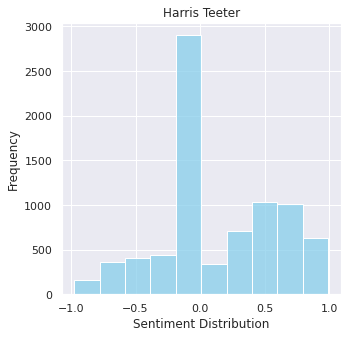

In [ ]:
# Function to visualize the sentiment for each company 
def visual_senti(df1,title):
  # settings for seaborn plotting style and size 
  sns.set(color_codes=True)
  sns.set(rc={'figure.figsize':(5,5)})

  fig, axes = plt.subplots(1, 1)

  # Create Histogram
  ax1 = sns.histplot(df1['C_Score'],
                    bins=10,
                    kde=False,
                    color='skyblue')
  ax1.set(title=title, xlabel='Sentiment Distribution', ylabel='Frequency')

# Call with each company's df
visual_senti(ht_df, 'Harris Teeter')

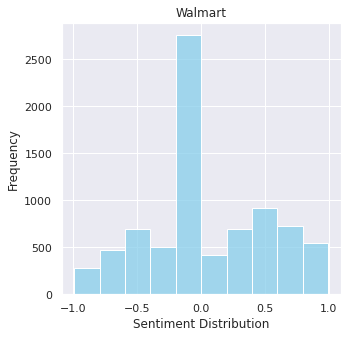

In [ ]:
visual_senti(wal_df, 'Walmart')

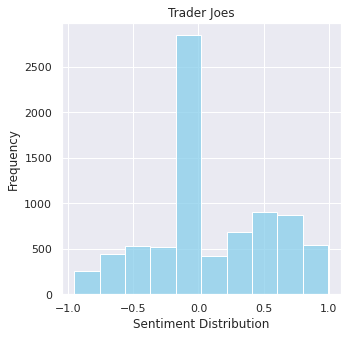

In [ ]:
visual_senti(tj_df, 'Trader Joes')

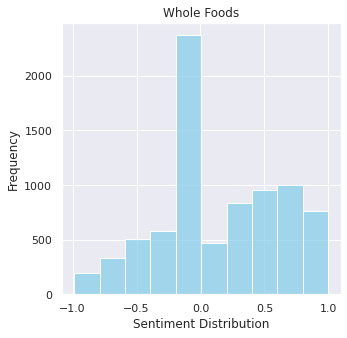

In [ ]:
visual_senti(wf_df, 'Whole Foods')

## Categorize Sentiments

We now create a sentiment column and catogorize tweets based on their C_Score

In [ ]:
def senti_col(df):
  # create new column
  df['Sentiment'] = np.nan

  # Loop through rows of dataframe and determine strings for new column "Sentiment"
  for index, row in df.iterrows(): 
      if df.loc[index, 'C_Score'] > 0.05 : 
              df.loc[index, 'Sentiment'] = "Positive"       
      elif df.loc[index, 'C_Score'] < -0.05 :
              df.loc[index, 'Sentiment'] = "Negative"   
      else : 
          df.loc[index, 'Sentiment'] = "Neutral"

  df['Sentiment'] = df['Sentiment'].astype("category")

# Call on each company
senti_col(ht_df)
senti_col(wal_df)
senti_col(tj_df)
senti_col(wf_df)

ht_df[['stripped','C_Score', 'Sentiment']].tail(25)
wal_df[['stripped','C_Score', 'Sentiment']].tail(25)
tj_df[['stripped','C_Score', 'Sentiment']].tail(25)
wf_df[['stripped','C_Score', 'Sentiment']].tail(25)


,stripped,C_Score,Sentiment
7975,nytimes Do people need recipes for beef? And is this supposed to slow down my consumption? Umm... I will still be at Whole Foods meat counter dancing as they weigh the beef.,0.0000,Neutral
7976,Whole Foods in my email begging me to apply I kinda want to tbh,0.0018,Neutral
7977,newbitchwhodis_ pls me complaining about parking from the whole foods parking lot /3,-0.1280,Negative
7978,"Supersoniclady3 Just eat as much raw fruit, veggies, nuts you can; all organic; ""whole foods"" also buy Russian or Italian flour, imported crackers, no potassium sorbate, much healthier. Also eat at organic places, and enjoy your life. If you are happy and grateful and strong, your body will win!",0.9299,Positive
7979,"Got my own personal ""corona vaccine"" - eating whole foods, exercising, losing weight, getting plenty of sun, being exposed to lots of pathogens. Has worked since Mar. 2020 and works on almost all viruses. We have an obesity epidemic is the real issue. Our population is sick!",-0.7574,Negative
7980,Simple carbs are the comfort foods that we often crave including white bread and sugary treats that have been stripped of all fiber and nutrients. Adding good carbs into your diet like unrefined whole grains and non-starchy vegetables can help aid with weight loss! UnCraveRx,0.8221,Positive
7981,"BinTwoPadstow dnkrbywine It works well in the US, but it’s a bit different. If I go to whole foods this evening I’ll take",0.1406,Positive
7982,Taking my Dietitian appointment from my car in the parking lot of Whole Foods feels predictable.,0.0000,Neutral
7983,whole foods was having a sale,0.0000,Neutral
7984,boydr2 Thanks You for boycotting and not supporting Amazon! I left them after screwed Whole Foods employees.,-0.7364,Negative


Now, we take a look at sentiment categories in each companies

In [ ]:
print("====HT Sentiment====")
print(ht_df['Sentiment'].value_counts())
print("====Walmart Sentiment====")
print(wal_df['Sentiment'].value_counts())
print("====TJ Sentiment====")
print(tj_df['Sentiment'].value_counts())
print("====WF Sentiment====")
print(wf_df['Sentiment'].value_counts())

====HT Sentiment====
Positive    3708
Neutral     2721
Negative    1571
Name: Sentiment, dtype: int64
====Walmart Sentiment====
Positive    3231
Neutral     2513
Negative    2256
Name: Sentiment, dtype: int64
====TJ Sentiment====
Positive    3381
Neutral     2627
Negative    1992
Name: Sentiment, dtype: int64
====WF Sentiment====
Positive    3957
Neutral     2118
Negative    1925
Name: Sentiment, dtype: int64


## Visualize Sentiments

Here, we take a look at sentiment categories with more informative charts to understand the breakdown of our data

Harris Teeter Senti Destribution


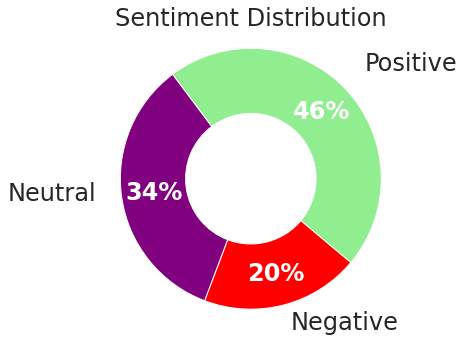

In [ ]:
# Set font size
plt.rcParams['font.size']=24

# Define figure
fig, ax = plt.subplots(figsize=(9, 6), subplot_kw=dict(aspect="equal"))

# Define colors
color_palette_list = ['lightgreen', 'purple', 'red','orange']

# Function to plot sentiment breakdown 
def senti_chart(df):
  # Get count by sentiment category from df
  sentiment_counts = df.Sentiment.value_counts()
  labels = sentiment_counts.index

  # Generate graph components
  wedges, texts, autotexts = ax.pie(sentiment_counts, wedgeprops=dict(width=0.5), startangle=-40,  
        colors=color_palette_list[0:3], autopct='%1.0f%%', pctdistance=.75, textprops={'color':"w", 'weight':'bold'})

  # Plot wedges
  for i, p in enumerate(wedges):
      ang = (p.theta2 - p.theta1)/2. + p.theta1
      y = np.sin(np.deg2rad(ang))
      x = np.cos(np.deg2rad(ang))
      horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
      connectionstyle = "angle,angleA=0,angleB={}".format(ang)
      ax.annotate(labels[i], xy=(x, y), xytext=(1.2*x, 1.2*y),
                  horizontalalignment=horizontalalignment)
  # Set title
  ax.set_title("Sentiment Distribution", y=.95, fontsize = 24)

  # Show Donut Chart
  plt.show()

# Call on each company 
print("Harris Teeter Senti Destribution")
senti_chart(ht_df)

Walmart Senti Destribution


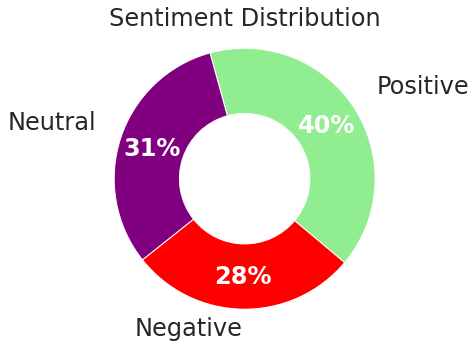

In [ ]:
# Set font size
plt.rcParams['font.size']=24

# Define figure
fig, ax = plt.subplots(figsize=(9, 6), subplot_kw=dict(aspect="equal"))

# Define colors
color_palette_list = ['lightgreen', 'purple', 'red','orange']

# Function to plot sentiment breakdown 
def senti_chart(df):
  # Get count by sentiment category from df
  sentiment_counts = df.Sentiment.value_counts()
  labels = sentiment_counts.index

  # Generate graph components
  wedges, texts, autotexts = ax.pie(sentiment_counts, wedgeprops=dict(width=0.5), startangle=-40,  
        colors=color_palette_list[0:3], autopct='%1.0f%%', pctdistance=.75, textprops={'color':"w", 'weight':'bold'})

  # Plot wedges
  for i, p in enumerate(wedges):
      ang = (p.theta2 - p.theta1)/2. + p.theta1
      y = np.sin(np.deg2rad(ang))
      x = np.cos(np.deg2rad(ang))
      horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
      connectionstyle = "angle,angleA=0,angleB={}".format(ang)
      ax.annotate(labels[i], xy=(x, y), xytext=(1.2*x, 1.2*y),
                  horizontalalignment=horizontalalignment)
  # Set title
  ax.set_title("Sentiment Distribution", y=.95, fontsize = 24)

  # Show Donut Chart
  plt.show()

# Call on each company 
print("Walmart Senti Destribution")
senti_chart(wal_df)

TJ Senti Destribution


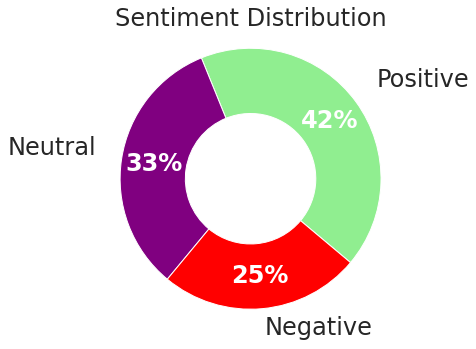

In [ ]:
# Set font size
plt.rcParams['font.size']=24

# Define figure
fig, ax = plt.subplots(figsize=(9, 6), subplot_kw=dict(aspect="equal"))

# Define colors
color_palette_list = ['lightgreen', 'purple', 'red','orange']

# Function to plot sentiment breakdown 
def senti_chart(df):
  # Get count by sentiment category from df
  sentiment_counts = df.Sentiment.value_counts()
  labels = sentiment_counts.index

  # Generate graph components
  wedges, texts, autotexts = ax.pie(sentiment_counts, wedgeprops=dict(width=0.5), startangle=-40,  
        colors=color_palette_list[0:3], autopct='%1.0f%%', pctdistance=.75, textprops={'color':"w", 'weight':'bold'})

  # Plot wedges
  for i, p in enumerate(wedges):
      ang = (p.theta2 - p.theta1)/2. + p.theta1
      y = np.sin(np.deg2rad(ang))
      x = np.cos(np.deg2rad(ang))
      horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
      connectionstyle = "angle,angleA=0,angleB={}".format(ang)
      ax.annotate(labels[i], xy=(x, y), xytext=(1.2*x, 1.2*y),
                  horizontalalignment=horizontalalignment)
  # Set title
  ax.set_title("Sentiment Distribution", y=.95, fontsize = 24)

  # Show Donut Chart
  plt.show()

# Call on each company 
print("TJ Senti Destribution")
senti_chart(tj_df)

Whole Foods Senti Destribution


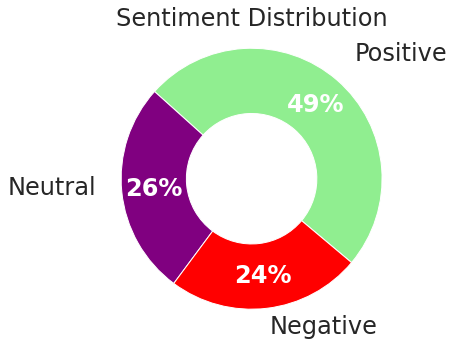

In [ ]:
# Set font size
plt.rcParams['font.size']=24

# Define figure
fig, ax = plt.subplots(figsize=(9, 6), subplot_kw=dict(aspect="equal"))

# Define colors
color_palette_list = ['lightgreen', 'purple', 'red','orange']

# Function to plot sentiment breakdown 
def senti_chart(df):
  # Get count by sentiment category from df
  sentiment_counts = df.Sentiment.value_counts()
  labels = sentiment_counts.index

  # Generate graph components
  wedges, texts, autotexts = ax.pie(sentiment_counts, wedgeprops=dict(width=0.5), startangle=-40,  
        colors=color_palette_list[0:3], autopct='%1.0f%%', pctdistance=.75, textprops={'color':"w", 'weight':'bold'})

  # Plot wedges
  for i, p in enumerate(wedges):
      ang = (p.theta2 - p.theta1)/2. + p.theta1
      y = np.sin(np.deg2rad(ang))
      x = np.cos(np.deg2rad(ang))
      horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
      connectionstyle = "angle,angleA=0,angleB={}".format(ang)
      ax.annotate(labels[i], xy=(x, y), xytext=(1.2*x, 1.2*y),
                  horizontalalignment=horizontalalignment)
  # Set title
  ax.set_title("Sentiment Distribution", y=.95, fontsize = 24)

  # Show Donut Chart
  plt.show()

# Call on each company 
print("Whole Foods Senti Destribution")
senti_chart(wf_df)

Next, we take a look at how sentiment categories have fluctated over time.

In [ ]:
# Function to analyze sentiment over time 
def senti_over_time(df):
    
  df['day'] = [one.date() for one in df['date']]
  df = df.sort_values(by=['day'])

  sentiments = ["Positive", "Neutral", "Negative"]
  positiveProps = (df[df.Sentiment == 'Positive'].groupby(['day']).count()[['Sentiment']]/ df.groupby(['day']).count()[['Sentiment']])*100
  neutralProps = (df[df.Sentiment == 'Neutral'].groupby(['day']).count()[['Sentiment']]/ df.groupby(['day']).count()[['Sentiment']])*100
  negativeProps = (df[df.Sentiment == 'Negative'].groupby(['day']).count()[['Sentiment']]/ df.groupby(['day']).count()[['Sentiment']])*100
  
  positiveProps = positiveProps['Sentiment'].tolist()
  neutralProps = neutralProps['Sentiment'].tolist()
  negativeProps = negativeProps['Sentiment'].tolist()
  plt.figure(figsize=[16, 5])
  barWidth = 0.5
  labels = df.day.unique()
  r = np.arange(len(labels))
  positiveProps = [0 if math.isnan(x) else x for x in positiveProps]
  neutralProps = [0 if math.isnan(x) else x for x in neutralProps]
  negativeProps = [0 if math.isnan(x) else x for x in negativeProps]

  plt.bar(r,positiveProps, color='lightgreen', edgecolor='white', width=barWidth)
  plt.bar(r, neutralProps, bottom=positiveProps, color='skyblue', edgecolor='white', width=barWidth)
  plt.bar(r, negativeProps, bottom=[i+j for i,j in zip(positiveProps, neutralProps)], color='orange', edgecolor='white', width=barWidth)
  
  plt.xticks(r, labels, rotation = 45, fontsize=12)
  plt.yticks(fontsize=16)
  plt.suptitle('Sentiment Distribution over Time')
  plt.xlabel("Date", fontsize=18)
  plt.ylabel("Share", fontsize=20)
  plt.legend(sentiments)
  plt.show()
  # Sort by Index again
  df.sort_index(inplace=True)


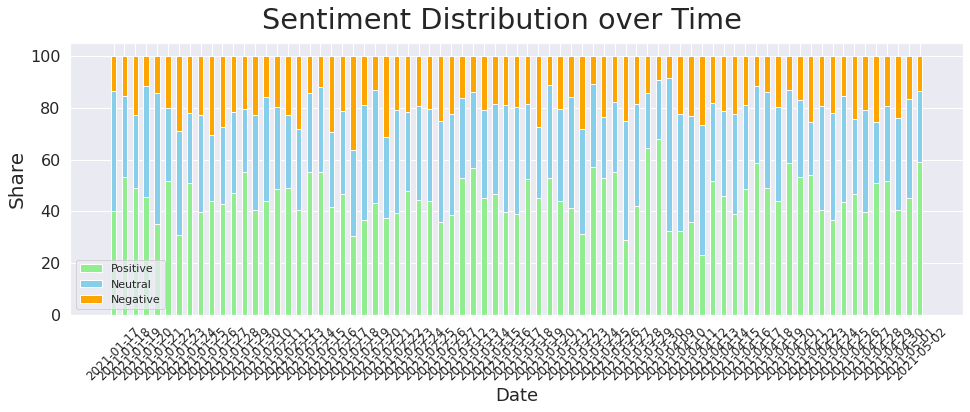

In [ ]:
# Harris Teeter Sentiment over Time
senti_over_time(ht_df)

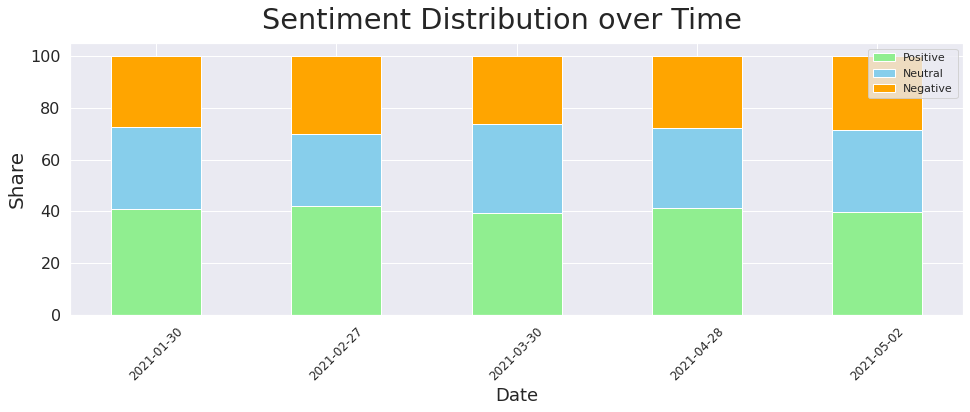

In [ ]:
# Walmart Sentiment over Time
senti_over_time(wal_df)

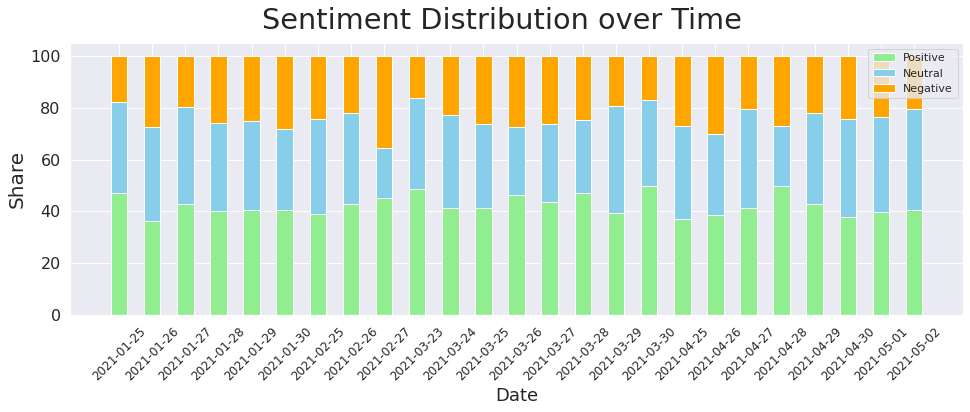

In [ ]:
# Trader Joe's Sentiment over Time
senti_over_time(tj_df)

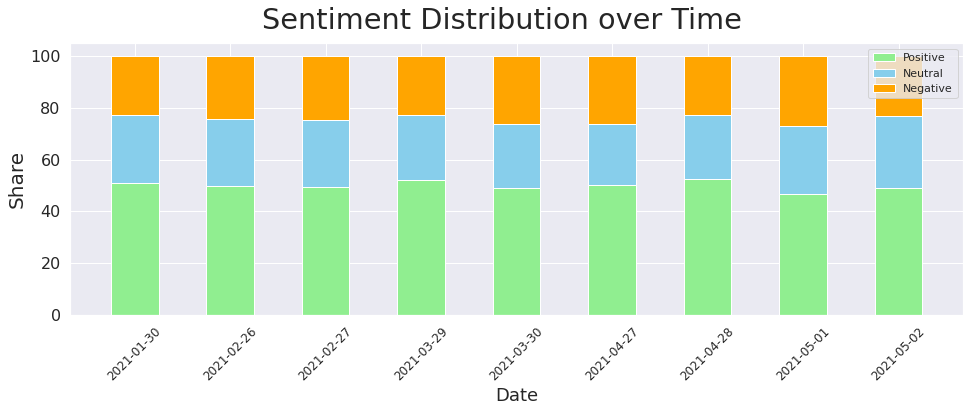

In [ ]:
# Whole Foods Sentiment over Time
senti_over_time(wf_df)

# Topic Tagging

In [ ]:
def topic_tags(df):
  # try to identify topics
  df['service'] = np.where(df.stripped.str.contains('(?:^|\W)(service)(?:$|\W)',flags = re.IGNORECASE), 1, 0)
  df['product'] = np.where(df.stripped.str.contains('(?:^|\W)(product)(?:$|\W)',flags = re.IGNORECASE), 1, 0)

  df['satisfied'] = np.where(df.stripped.str.contains('(?:^|\W)(thank|happy|satisfied|love)(?:$|\W)',flags = re.IGNORECASE), 1, 0)
  df['sale'] = np.where(df.stripped.str.contains('(?:^|\W)(sale|promotion|discount|coupon|rebate)(?:$|\W)', flags = re.IGNORECASE), 1, 0)
  df['unsatisfied'] = np.where(df.stripped.str.contains('(?:^|\W)(expensive|awful|bad|gross)(?:$|\W)',flags = re.IGNORECASE), 1, 0)

  # How many tweets of each topic?
  print(f"service {df['service'].sum()}")
  print(f"product {df['product'].sum()}")
  print(f"satisfied {df['satisfied'].sum()}")
  print(f"unsatisfied {df['unsatisfied'].sum()}")
  print(f"sale {df['sale'].sum()}")

  # Show tweets with their repsective topic labels
  pd.set_option('display.max_colwidth', None)
  display(df.loc[df['service']>0]['stripped'].head(5))
  display(df.loc[df['product']>0]['stripped'].head(5))
  display(df.loc[df['satisfied']>0]['stripped'].head(5))
  display(df.loc[df['unsatisfied']>0]['stripped'].head(5))
  display(df.loc[df['sale']>0]['stripped'].head(5))
 
# Call on each company
print("=============HT topic tags=====================")
topic_tags(ht_df)

=============HT topic tags=====================


/usr/local/lib/python3.7/dist-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


service 51
product 52
satisfied 250
unsatisfied 103
sale 204


2                  Harris Teeter continues to support service members and military families. Shop at your local HarrisTeeter and "Round-Up" your shopping total to the nearest $. Funds from this campaign will support USO Service member and family programs. HTRoundUp SupportOurTroops uso
156    Was in Harris Teeter, and they had Eggland's Best eggs on sale. All that was out had broken eggs, so I mention this to a wonderful young lady named Daisy, and she finds me 4 dozen in the back, and even goes through them all to make sure nothing is broken. Great customer service!
193                                                                                                                                                                    the sexual tension between me and the half torn box of black and milds behind the Harris Teeter customer service desk..
346                                 Save at both the register and the Gas Pump when you visit HarrisTeeter. You can support our military se

18     marijuana cannabis cannabiscommunity Alkaline88® Expands Product Offering in Harris Teeter SCOTTSDALE, Ariz.--(BUSINESS WIRE)--The Alkaline Water Company Inc. (NASDAQ and CSE: WTER) (the “Company”), the country’s largest independent
28     cannabis marijuana cannabiscommunity Alkaline88® Expands Product Offering in Harris Teeter SCOTTSDALE, Ariz.--(BUSINESS WIRE)--The Alkaline Water Company Inc. (NASDAQ and CSE: WTER) (the “Company”), the country’s largest independent
148                                                                                                                                                                        Alkaline88® Expands Product Offering in Harris Teeter. $WTER $WTER.C
164                                                                                                          $WTER Alkaline88® Expands Product Offering in Harris Teeter Business Wire smallcapsdaily smallcaps microcap stocks trading profits
172                                     

39     2017 Las Rocas Garnacha (Calatayud, Spain) Rich blackberry and dark cherry with delicate oak and a hint of s Love me some Garnacha, and this is a yummy one! Enjoyed while spending some quality time with some friends! Purchased for $11.99 from Harris Teeter in Cary, NC.
139                                   BF: you’re lucky I love you so much that Harris Teeter was closed so I had to go get you wine from that Asian place down the street. Me: what Asian place? BF: you know the one uhh.. what’s it called umm... FOOD LION! I’m sorry whatttt 😂😭😭
237                                                                                  nightfoodzZz ErikTheElectric I tried your product in Harris Teeter, and instantly fell in love. It tastes so much better than Halo Top, the consistency feels so much closer to real ice cream.
251                                                                                                                                                                      

12                                                                                                                                                                                                                 Harris Teeter is about as bad as Walmart on a Sunday
111    queenveej Idk if Harris Teeter is but they’re expensive as hell lol… Only ever been to one in VA Beach but my God. I guess maybe Whole Foods or Fresh Market too🤷🏽‍♀️ never been in a Publix because we don’t have them where I live. Lol we just shop at Kroger
131                                                                                                                                                                                   me when i worked at harris teeter ong anyone with bad vibes getting this response
185                   GSUtruebluedrew Harris Teeter quality went way down when Kroger bought them. Earth Fare is good if you live near one. Fresh Market is underrated but expensive. I live near a trader joes 

9                                                                                                                                                                                                                      Sample Tweet: Harris Teeter at Tryon Village subs are on sale for $3.99
24                                                                                                                                                                                                New blog post: Free So Delicious Dairy Free Pairings from Harris Teeter with new coupon wral
129                                                                                         There is a new Ibotta rebate out for Herdez Salsa right now. Take it in to Kroger or Harris Teeter and combine it with sales to get salsa for just $1! krogerdeal harristeeterdeal herdezsalsa ...
143                                                                                                  Calling all Wakefeild Customers!!! we 

In [ ]:
print("=============Walmart topic tags=====================")
topic_tags(wal_df)

=============Walmart topic tags=====================


/usr/local/lib/python3.7/dist-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


service 57
product 34
satisfied 253
unsatisfied 97
sale 72


60                                                                                           I can’t say enough about Walmart Family Mobile! With their rewards program, I can earn points toward a FREE service plan, data add-ons and dining discounts. WalmartFamilyMobileRewards
148                                                 My service includes: amazon accounthealth dropshipping walmartmarketplace B2B FBM Inventory amazontowalmart productfind customerservice retail sales shipping marketing virtualassistant amazonseller ebaylister walmart listing
176                                                           Customers can’t even shop for clothes because lines all the way backed up to the clothes section .. horrible service every time . Y’all have all these lanes but only be having 3 open Walmart we’re not living better
433    I just signed up for Walmart delivery service, first order was delivered to the wrong house. They get a big order of groceries and I can’t even get my order re-se

170          jguipre Simply as a sales/marketing question -- and leaving aside the paradox of the rather indirect intellectual hawking of a nutritionally and culinarily wanting product -- I question whether an appeal to educated Twitter moves much processed meat in the Walmart frozen food section?
516                                                                                                                                                                                                                                             ellen has a line of cheapy ugly design product at walmart.
565                                                                                                                                         Flipkart fraud company..His send me stone replace a watch 10645. Fraud company. Anybody not purchase any product this side. binnybansal Walmart fraud mppolice
834    Molson_Hart NonGaap For a while I would only buy things from $WMT or $TGT online but even Walmar

52     KFILE Grackle. You can tell by the loud, annoying call. They also love to hang out in Walmart parking lots.
104                                             I THINK IM A HOMOSEXUAL IM NOT EVEN PAN ANYMORE I FUCKING LOVE MEN
114                                                                    Unapologetically self absorbed bc self love
143                                                                          Tainted love playing in Walmart vibes
150                         EricDresdale The one in West Boca is like a Walmart compared to central. Love Regency.
Name: stripped, dtype: object

58                                                        Canadian Liberals will call Ford or that fuck Kenney, "Trump lite." They won't go so far as to outright call them "Trump" or even a Walmart Trump. In Canada its basically "Hitler lite." And that's "not as bad as the US."
59                                                                                                                                                                              I’ve wasted my entire weekend in bed except for a Walmart trip and I don’t know if I feel bad about it
447         RyanGarciaESM Thoughts on possible Jose Urena trade deadline accusation? I think it’d be great. Would not be expensive at all, is cheap, and on a 1-year deal. He has great stuff and reminds me of a Walmart Luis Castillo. I really want this guy. Maybe German for him?
454    JuddLegum PoliticalBee yup... those uber patriots with rifles gonna fend off Commie invaders and tofu eating tree hugging lib's too bad offshoring by Americ

108                                                                                                    The new Walmart check-outs are garbage ...I should get a discount for having to do the cashiers job ....
304    Remember how Walmart held a Food Donation Event for its own employees one Thanksgiving? I also think about how when I worked there, I received a pay-decrease after receiving a promotion. 🙃 good times.
338                                                                                         sarahwIkrs she grew into less annoying still an annoying personality lacking blonde who was discount walmart rachel
425                                                                                                                                                1futhermucker Thoose them on sale crab legs that b Walmart 🤣
586                                                                                                                                                           Save on Wa

In [ ]:
print("=============TJ topic tags=====================")
topic_tags(tj_df)

=============TJ topic tags=====================


/usr/local/lib/python3.7/dist-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


service 25
product 24
satisfied 422
unsatisfied 126
sale 15


415     Deetruthhurts CStrait2 mercurygirl7 JuddLegum Acyn RonDeSantisFL UnitedHealthGrp Publix AnheuserBusch ATT CVSHealth cvs Trader Joe’s is great. Great quality, price, service, spirit / values and ETHICS. In our family we’ve relied on Trader Joes for more than 10 years. We trust them and we love them. You won’t regret switching to Trader Joe’s.
599                                                                                                                                                                                                              AshGotThis I literally was looking for a way to get trader joes delivered cuz I couldnt find any service that did it and that's how I found it
859                                                                                                                                                                                                                                                 Traders Joes needs go to ahead and get a delivery se

386     let me explain: i was at checking out at trader joes and the cashier was very cute so we were talking and towards the end he went “im sorry idk if its ur hair product or perfume but u smell absolutely amazing” so of course i just stood there and got as red as an brown girl can get
447                                                                                                                                                       if you’re looking at any product at trader joes that says “s on it i promise you it’s the least s thing you will ever eat in your life.
450          *Review* Gone Bananas ($1.99) : 10/10 Obviously I love this because like I’ve said before, dark chocolate is superior. I was worried about the slices being mushy or slimy but they weren't! I also can’t get over the price of this product! I will definitely purchase this again.
580                                                                                                                               

8                                                                                                                                                                                             ASpaceSlav Thank God. Was tired of that meme
14                                                                                                                                                                                                      Jesus_Vega3 i love trader joes tbh
41           I’m back in my beloved Los Angeles this week. And while it has changed and I have changed, I still love everything it has ever been for me past, present, future. I’m gonna try silver lake trader joes today - wish me luck.
47    Thank you Kieth at the Trader Joe's on Lincoln and Grace! You bought my dying grandma tulips, taught my aunt how to propaganda her plant, and made my mom happy cry. I love you Kieth!!! traderjoes goodguykieth buyastrangerflowers
51                                                          

34                                                                                                                                             ZaNegotiater Not that bad, cought a bit but it was nice burnt after taste. Like mint
53                                                      TorontoStar jaimewatt Open the border with the US, they've gotten covid under control. And Canada never had covid bad in the first place. Let me shop at trader joes dammit
71     I know a lot of us have recently had this revelation but moesha was really an awful show. Premise wise lol. Like she was awful. Frank was shitty. Like the only ppl worth a damn was Andel and Dee lol. Everyone else... meh
130                                                                                                        crying while looking at trader joes products i want to be in the states so bad take away my rights i want colonizer food
158                                                                                     

301                                                                                                                                                                                                                                              goslingfan69 That thing for sale at trader joes
1187                                                                                                                                                                                                                                 look what I found on sale at trader joes should i buy him??
1249                       rlallensack Macrobars, honestly. They are mostly all low-FODMAP and don't irritate my gut. You can buy them at all sorts of stores now, including Trader Joes, they'll be in the granola bar or protein bar section. You can also order them directly, often on sale.
1362    ToniC8 Many apps and websites that are used by retail (avg joes) blocked the sale of Gamestop stock... Leaving the commercial

In [ ]:
print("=============TJ topic tags=====================")
topic_tags(tj_df)

=============TJ topic tags=====================


/usr/local/lib/python3.7/dist-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


service 25
product 24
satisfied 422
unsatisfied 126
sale 15


415     Deetruthhurts CStrait2 mercurygirl7 JuddLegum Acyn RonDeSantisFL UnitedHealthGrp Publix AnheuserBusch ATT CVSHealth cvs Trader Joe’s is great. Great quality, price, service, spirit / values and ETHICS. In our family we’ve relied on Trader Joes for more than 10 years. We trust them and we love them. You won’t regret switching to Trader Joe’s.
599                                                                                                                                                                                                              AshGotThis I literally was looking for a way to get trader joes delivered cuz I couldnt find any service that did it and that's how I found it
859                                                                                                                                                                                                                                                 Traders Joes needs go to ahead and get a delivery se

386     let me explain: i was at checking out at trader joes and the cashier was very cute so we were talking and towards the end he went “im sorry idk if its ur hair product or perfume but u smell absolutely amazing” so of course i just stood there and got as red as an brown girl can get
447                                                                                                                                                       if you’re looking at any product at trader joes that says “s on it i promise you it’s the least s thing you will ever eat in your life.
450          *Review* Gone Bananas ($1.99) : 10/10 Obviously I love this because like I’ve said before, dark chocolate is superior. I was worried about the slices being mushy or slimy but they weren't! I also can’t get over the price of this product! I will definitely purchase this again.
580                                                                                                                               

8                                                                                                                                                                                             ASpaceSlav Thank God. Was tired of that meme
14                                                                                                                                                                                                      Jesus_Vega3 i love trader joes tbh
41           I’m back in my beloved Los Angeles this week. And while it has changed and I have changed, I still love everything it has ever been for me past, present, future. I’m gonna try silver lake trader joes today - wish me luck.
47    Thank you Kieth at the Trader Joe's on Lincoln and Grace! You bought my dying grandma tulips, taught my aunt how to propaganda her plant, and made my mom happy cry. I love you Kieth!!! traderjoes goodguykieth buyastrangerflowers
51                                                          

34                                                                                                                                             ZaNegotiater Not that bad, cought a bit but it was nice burnt after taste. Like mint
53                                                      TorontoStar jaimewatt Open the border with the US, they've gotten covid under control. And Canada never had covid bad in the first place. Let me shop at trader joes dammit
71     I know a lot of us have recently had this revelation but moesha was really an awful show. Premise wise lol. Like she was awful. Frank was shitty. Like the only ppl worth a damn was Andel and Dee lol. Everyone else... meh
130                                                                                                        crying while looking at trader joes products i want to be in the states so bad take away my rights i want colonizer food
158                                                                                     

301                                                                                                                                                                                                                                              goslingfan69 That thing for sale at trader joes
1187                                                                                                                                                                                                                                 look what I found on sale at trader joes should i buy him??
1249                       rlallensack Macrobars, honestly. They are mostly all low-FODMAP and don't irritate my gut. You can buy them at all sorts of stores now, including Trader Joes, they'll be in the granola bar or protein bar section. You can also order them directly, often on sale.
1362    ToniC8 Many apps and websites that are used by retail (avg joes) blocked the sale of Gamestop stock... Leaving the commercial

#Word Cloud Creation

Here we create word clouds for each company to get initial impressions on the content of the tweets before tokenizing the data

In [ ]:
# Create bag of words for tweets of certain sentiment
ht_words = ' '.join([text for text in ht_df[ht_df['Sentiment'] == 'Positive']['cleaned']])
wal_words = ' '.join([text for text in wal_df[wal_df['Sentiment'] == 'Positive']['cleaned']])
tj_words = ' '.join([text for text in tj_df[tj_df['Sentiment'] == 'Positive']['cleaned']])
wf_words = ' '.join([text for text in wf_df[wf_df['Sentiment'] == 'Positive']['cleaned']])

# Generate Word Cloud
ht_wordcloud = WordCloud(collocations=True, width=800, height=500, random_state=5, max_font_size=110).generate(ht_words)
wal_wordcloud = WordCloud(collocations=True, width=800, height=500, random_state=5, max_font_size=110).generate(wal_words)
tj_wordcloud = WordCloud(collocations=True, width=800, height=500, random_state=5, max_font_size=110).generate(tj_words)
wf_wordcloud = WordCloud(collocations=True, width=800, height=500, random_state=5, max_font_size=110).generate(wf_words)


Visualize Word Clouds

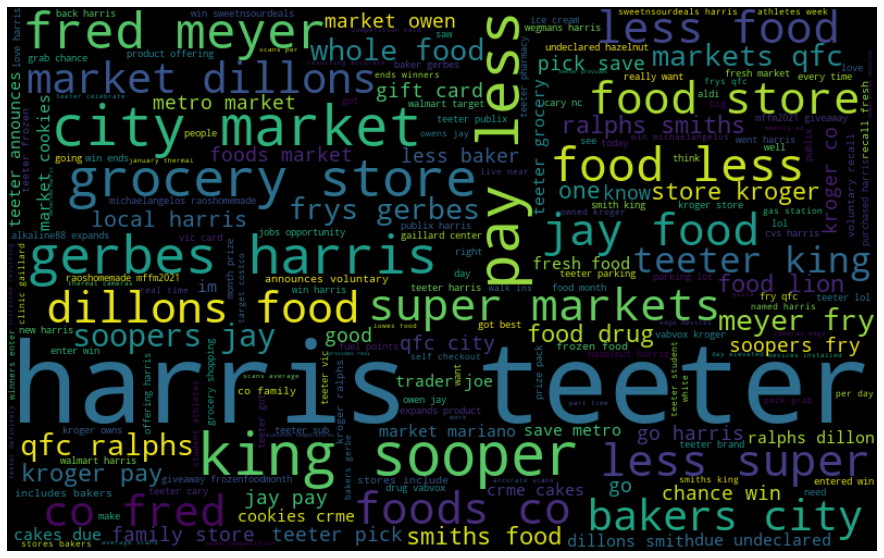

In [ ]:
plt.figure(figsize=(20, 10))
plt.imshow(ht_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

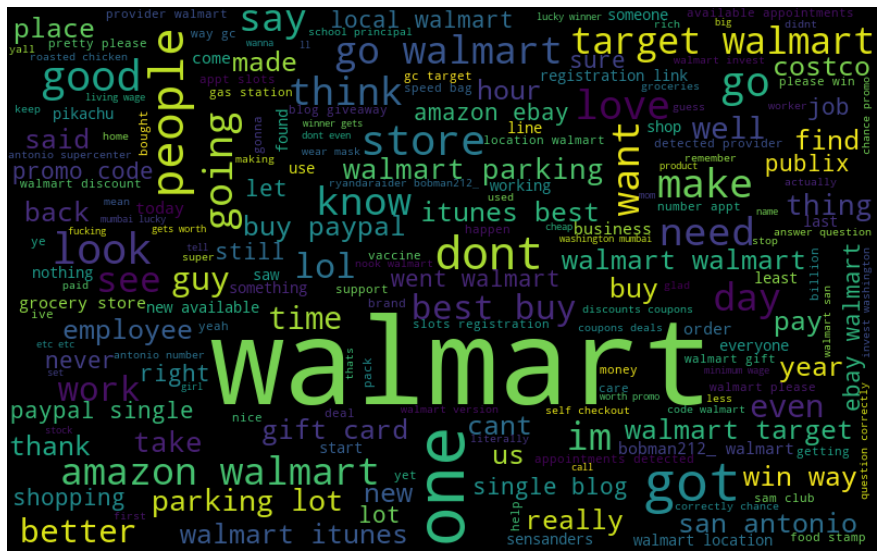

In [ ]:
plt.figure(figsize=(20, 10))
plt.imshow(wal_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

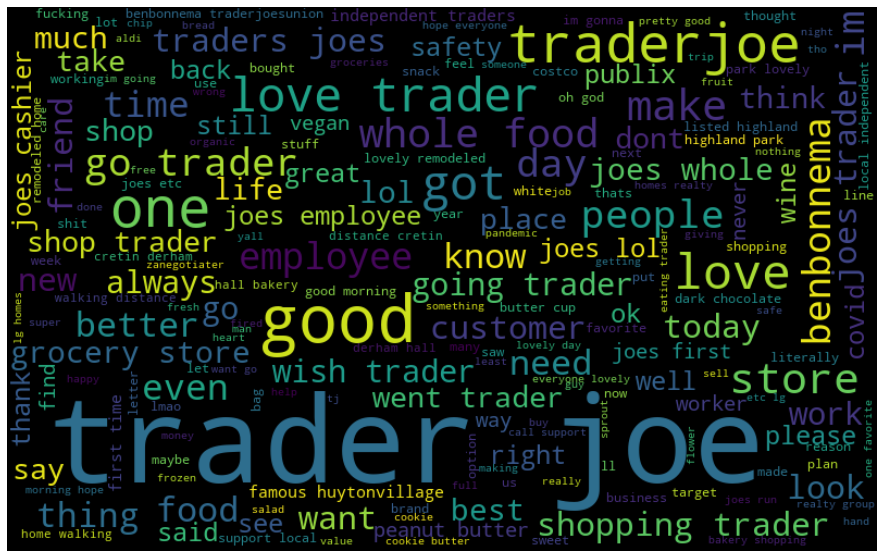

In [ ]:
plt.figure(figsize=(20, 10))
plt.imshow(tj_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

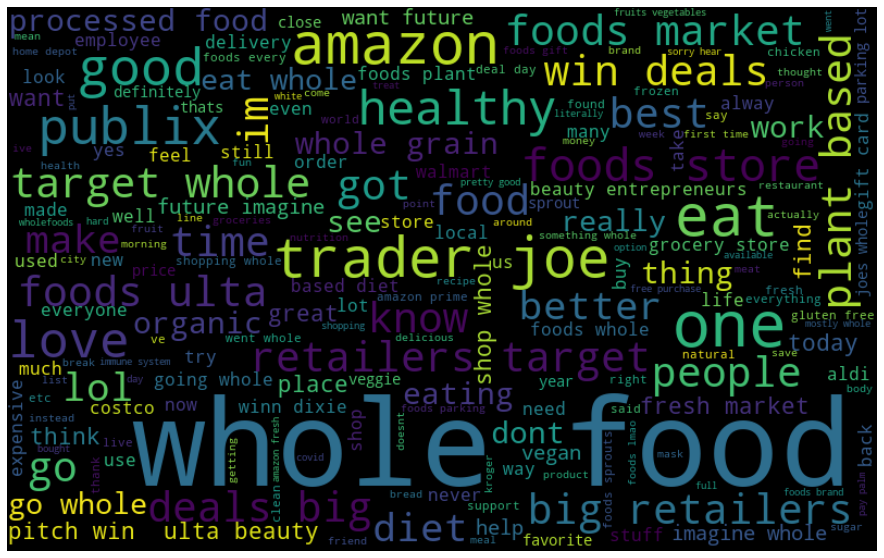

In [ ]:
plt.figure(figsize=(20, 10))
plt.imshow(wf_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Tokenization

Now we create a corpus for each company's dataframe by tokenizing the content of the tweets. 

In [ ]:
# Splitting the description into word tokens
def tokenize(df):
    corpus = []
    for row in df['cleaned']:
      corpus.append(row.split())
    return corpus

ht_corpus = tokenize(ht_df)
print("============HT tokens==============")
print(ht_corpus)

wal_corpus = tokenize(wal_df)
print("============Walmart tokens==============")
print(wal_corpus)

tj_corpus = tokenize(tj_df)
print("============TJ tokens==============")
print(tj_corpus)

wf_corpus = tokenize(wf_df)
print("============WF tokens==============")
print(wf_corpus)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# Word Vector Models

Here, we create models for each company's dataframe to be used for word embedding

Harris Teeter Word Vector Model

In [ ]:
ht_model = Word2Vec(size=300, window=5, min_count=2)

#Step 1: We start by incorporating the vocabulary of our specific corpus into the google model
ht_model.build_vocab(ht_corpus)

#Step 2: We obtain the word vectors for the words in the vocabulary that are already present in pre-trained word2vec model.
ht_model.intersect_word2vec_format(EMBEDDING_FILE, lockf=1.0, binary=True)

#Step 3: We fine-tune the model to learn new contexts of words in our corpus
ht_model.train(ht_corpus, total_examples=ht_model.corpus_count, epochs = 5)

(463043, 573000)

Walmart Word Vector Model

In [ ]:
wal_model = Word2Vec(size=300, window=5, min_count=2)

#Step 1: We start by incorporating the vocabulary of our specific corpus into the google model
wal_model.build_vocab(wal_corpus)

#Step 2: We obtain the word vectors for the words in the vocabulary that are already present in pre-trained word2vec model.
wal_model.intersect_word2vec_format(EMBEDDING_FILE, lockf=1.0, binary=True)

#Step 3: We fine-tune the model to learn new contexts of words in our corpus
wal_model.train(wal_corpus, total_examples=wal_model.corpus_count, epochs = 5)

(429710, 505665)

Trader Joe's Word Vector Model

In [ ]:
tj_model = Word2Vec(size=300, window=5, min_count=2)

#Step 1: We start by incorporating the vocabulary of our specific corpus into the google model
tj_model.build_vocab(tj_corpus)

#Step 2: We obtain the word vectors for the words in the vocabulary that are already present in pre-trained word2vec model.
tj_model.intersect_word2vec_format(EMBEDDING_FILE, lockf=1.0, binary=True)

#Step 3: We fine-tune the model to learn new contexts of words in our corpus
tj_model.train(tj_corpus, total_examples=tj_model.corpus_count, epochs = 5)

(338863, 427125)

Whole Food's Word Vector Model

In [ ]:
wf_model = Word2Vec(size=300, window=5, min_count=2)

#Step 1: We start by incorporating the vocabulary of our specific corpus into the google model
wf_model.build_vocab(wf_corpus)

#Step 2: We obtain the word vectors for the words in the vocabulary that are already present in pre-trained word2vec model.
wf_model.intersect_word2vec_format(EMBEDDING_FILE, lockf=1.0, binary=True)

#Step 3: We fine-tune the model to learn new contexts of words in our corpus
wf_model.train(wf_corpus, total_examples=wf_model.corpus_count, epochs = 5)

(476622, 589755)

# Multidimensional Analysis

## Feature Engineering: Pairs

First, we create pairs of words that will be important correlations in our twitter content. 
- For example if we want to know if the service at Harris Teeter is good, we can look at the correlation of these two words in the content of the tweets. 

We can then compare pairings of words across the companies. 

In [ ]:
pairs = [
    #service 
    ('service','awesome'),
    ('service','nice'),
    ('service','great'),
    ('service', 'good'),   
    ('service', 'bad'),  
    ('service', 'awful'),
    ('service','terrible'),
    ('service','horrible'),
    ('service','shit'),
    ('good','experience'),
    ('bad','experience'),

    #waiting time
    ('wait', 'long'),
    ('wait', 'short'),
    ('time','long'),
    ('line','long'),
    ('wait', 'hours'),
    ('time','short'),
    ('wait','fast'),
    ('line','short'),
    ('wait','quick'),
    ('time','quick'),

    #prices 
    ('price', 'high'),
    ('price','expensive'),
    ('price','bad'),
    ('price','cheap'),
    ('price', 'low'),
    ('price', 'sale'),
    ('price','discount'),

    #covid
    ('covid', 'safe'),
    ('covid', 'masks'),

    #employees
    ('employee', 'nice'),
    ('employee', 'mean'),
    ('cashier','nice'),
    ('employee','lovely'),
    ('employee','kind'),
    ('cashier','kind'),
    ('cashier','lovely'),
    ('manager','mean'),
    ('manager','nice'),
    ('manager','kind'),
    ('manager','helpful'),
    ('employee','helpful'),

    #healthy
    ('food','healthy'),
    ('food','vegan'),
    ('food','canned'),
    ('fresh','natural'),
    ('food','vegetarian'),
    ('fresh','vegan'),
    ('fresh','vegetarian'),
    ('fresh','produce'),
    ('healthy','produce')
]
def similarity_test(model):
  arr = []
  for w1, w2 in pairs:
    val = model.wv.similarity(w1,w2)
    print('%r\t%r\t%.2f' % (w1, w2, val))
    arr.append(val)
  return arr

print("========HT==========")
ht_corr = similarity_test(ht_model)
print("========Wal==========")
wal_corr = similarity_test(wal_model)
print("========TJ==========")
tj_corr = similarity_test(tj_model)
print("========WF==========")
wf_corr = similarity_test(wf_model)

========HT==========
'service'	'awesome'	0.38
'service'	'nice'	0.41
'service'	'great'	0.53
'service'	'good'	0.30
'service'	'bad'	0.36
'service'	'awful'	0.39
'service'	'terrible'	0.27
'service'	'horrible'	0.33
'service'	'shit'	0.32
'good'	'experience'	0.37
'bad'	'experience'	0.32
'wait'	'long'	0.63
'wait'	'short'	0.36
'time'	'long'	0.64
'line'	'long'	0.58
'wait'	'hours'	0.47
'time'	'short'	0.37
'wait'	'fast'	0.46
'line'	'short'	0.40
'wait'	'quick'	0.47
'time'	'quick'	0.31
'price'	'high'	0.44
'price'	'expensive'	0.52
'price'	'bad'	0.38
'price'	'cheap'	0.53
'price'	'low'	0.49
'price'	'sale'	0.57
'price'	'discount'	0.58
'covid'	'safe'	0.26
'covid'	'masks'	0.33
'employee'	'nice'	0.36
'employee'	'mean'	0.31
'cashier'	'nice'	0.43
'employee'	'lovely'	0.35
'employee'	'kind'	0.41
'cashier'	'kind'	0.38
'cashier'	'lovely'	0.42
'manager'	'mean'	0.36
'manager'	'nice'	0.42
'manager'	'kind'	0.46
'manager'	'helpful'	0.25
'employee'	'helpful'	0.20
'food'	'healthy'	0.30
'food'	'vegan'	0.45
'food'	'canned

## Creation of Multidimensional Dataframe

In [ ]:
df_multi = pd.DataFrame(data=[ht_corr, wal_corr, tj_corr, wf_corr], columns=['service_awesome','service_nice', 'service_great','service_good','service_bad','service_awful','service_terrible','service_horrible','service_shit','good_experience','bad_experience','wait_long','wait_short','time_long','line_long','wait_hours','time_short','wait_fast','line_short','wait_quick','time_quick','price_high','price_expensive','price_bad','price_cheap','price_low','price_sale','price_discount','covid_safe','covid_masks','employee_nice','employee_mean','cashier_nice','employee_lovely','employee_kind','cashier_kind','cashier_lovely','manager_mean','manager_nice', 'manager_kind', 'manager_helpful','employee_helpful','food_healthy','food_vegan','food_canned','fresh_nature','food_vegetarian','fresh_vegan','fresh_vegetarian','fresh_produce','healthy_produce'])
df_multi['store'] = ["Harris Teeter","Walmart","Trader Joe","Whole Foods"]
df_multi.set_index(df_multi['store'], inplace=True)
df_multi = df_multi.drop(labels='store',axis=1)
df_multi

,service_awesome,service_nice,service_great,service_good,service_bad,service_awful,service_terrible,service_horrible,service_shit,good_experience,bad_experience,wait_long,wait_short,time_long,line_long,wait_hours,time_short,wait_fast,line_short,wait_quick,time_quick,price_high,price_expensive,price_bad,price_cheap,price_low,price_sale,price_discount,covid_safe,covid_masks,employee_nice,employee_mean,cashier_nice,employee_lovely,employee_kind,cashier_kind,cashier_lovely,manager_mean,manager_nice,manager_kind,manager_helpful,employee_helpful,food_healthy,food_vegan,food_canned,fresh_nature,food_vegetarian,fresh_vegan,fresh_vegetarian,fresh_produce,healthy_produce
store,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Harris Teeter,0.377917,0.406663,0.527076,0.297621,0.355803,0.388303,0.271505,0.329481,0.320715,0.367938,0.315206,0.625538,0.362377,0.640431,0.576416,0.471932,0.369988,0.463842,0.395040,0.467411,0.311749,0.435401,0.524316,0.381373,0.532484,0.494092,0.570848,0.579994,0.258669,0.328899,0.363112,0.310355,0.425737,0.346008,0.409454,0.376646,0.421166,0.358873,0.421935,0.458581,0.252447,0.200705,0.300062,0.450371,0.440927,0.228702,0.398910,0.394268,0.348974,0.586692,0.401623
Walmart,0.358411,0.424889,0.555621,0.376193,0.465173,0.271538,0.390620,0.370439,0.333187,0.501042,0.516214,0.716392,0.611115,0.694034,0.679169,0.654976,0.598753,0.402287,0.599961,0.490313,0.410153,0.490450,0.550926,0.488480,0.648356,0.527675,0.681848,0.573066,0.494269,0.501233,0.469309,0.540811,0.365001,0.245464,0.545320,0.384022,0.261853,0.395802,0.414529,0.454189,0.273620,0.336654,0.435896,0.401092,0.433738,0.322929,0.407909,0.290641,0.295839,0.351583,0.257600
Trader Joe,0.243688,0.428939,0.564483,0.355144,0.417896,0.313623,0.347943,0.291171,0.402697,0.418421,0.440592,0.679420,0.480878,0.672597,0.675257,0.559938,0.535838,0.279687,0.563123,0.422558,0.429930,0.516559,0.543686,0.412035,0.574003,0.592251,0.535641,0.522514,0.649761,0.644913,0.516551,0.467722,0.466855,0.365336,0.583873,0.471908,0.365681,0.134004,0.196836,0.266569,0.166733,0.314760,0.451055,0.628442,0.587826,0.453018,0.549173,0.509683,0.421941,0.566119,0.420367
Whole Foods,0.303554,0.368869,0.536742,0.291400,0.348554,0.313164,0.306557,0.185857,0.284659,0.404763,0.373970,0.643160,0.401122,0.658345,0.610728,0.554624,0.433522,0.456011,0.438395,0.455191,0.388747,0.562174,0.572953,0.432690,0.560514,0.565301,0.702508,0.577662,0.586838,0.588964,0.359037,0.371094,0.408612,0.235706,0.392637,0.395457,0.346923,0.313183,0.374846,0.392504,0.280606,0.322336,0.729303,0.610310,0.468410,0.553393,0.512884,0.408893,0.383322,0.599831,0.515412


In [ ]:
#polarize sentiment correlations
df_test = df_multi.copy(deep=True)
df_pol = pd.DataFrame()
df_pol['agg_pos_service'] = (df_test['service_awesome']+df_test['service_nice']+df_test['service_great']+df_test['service_good']+df_test['good_experience'])/5
df_pol['agg_neg_service'] = (df_test['service_bad'] + df_test['service_awful'] + df_test['service_terrible']+df_test['service_horrible']+df_test['service_shit']+df_test['bad_experience'])/6
df_pol['agg_pos_wait'] = (df_test['wait_short']+df_test['time_short']+df_test['line_short']+df_test['wait_quick']+df_test['wait_fast']++df_test['time_quick'])/6
df_pol['agg_neg_wait'] = (df_test['wait_long']+df_test['time_long']+df_test['line_long']+df_test['wait_hours'])/4
df_pol['agg_pos_price'] = (df_test['price_low']+df_test['price_sale']+df_test['price_cheap']+df_test['price_discount'])/3
df_pol['agg_neg_price'] = (df_test['price_high']+df_test['price_expensive']+df_test['price_bad'])/3
df_pol['agg_pos_employee'] = (df_test['employee_nice']+df_test['cashier_nice']+df_test['employee_lovely']+df_test['employee_kind']+df_test['cashier_kind']+df_test['cashier_lovely']+df_test['manager_nice']+df_test['manager_kind']+df_test['manager_helpful']+df_test['employee_helpful'])/10
df_pol['agg_neg_employee'] = (df_test['employee_mean']+df_test['manager_mean'])/2
df_pol['agg_pos_health'] = (df_test['food_healthy'] + df_test['food_vegan'] + df_test['fresh_nature'] + df_test['food_vegetarian'] + df_test['fresh_vegan'] + df_test['fresh_vegetarian']+df_test['fresh_produce'] + df_test['healthy_produce'])/8
df_pol['agg_neg_health'] = df_test['food_canned']
df_pol

,agg_pos_service,agg_neg_service,agg_pos_wait,agg_neg_wait,agg_pos_price,agg_neg_price,agg_pos_employee,agg_neg_employee,agg_pos_health,agg_neg_health
store,,,,,,,,,,
Harris Teeter,0.395443,0.330169,0.395068,0.578579,0.725806,0.447030,0.367579,0.334614,0.388700,0.440927
Walmart,0.443231,0.391195,0.518764,0.686142,0.810315,0.509952,0.374996,0.468307,0.345436,0.433738
Trader Joe,0.402135,0.368987,0.452002,0.646803,0.741470,0.490760,0.371510,0.300863,0.499975,0.587826
Whole Foods,0.381066,0.302127,0.428831,0.616715,0.801995,0.522606,0.350866,0.342139,0.539168,0.468410


In [ ]:
from statistics import mean
df_test = df_multi.copy(deep=True)

#combine similar measures onto one scale

#SERVICE QUALITY SENTIMENT: Higher score if store brand associated with positive service quality words, low score if with negative service quality words
df_test['agg_service'] =((df_test['service_awesome']+df_test['service_nice']+df_test['service_great']+df_test['service_good']+df_test['good_experience'])/5)*1 + -1*((df_test['service_bad'] + df_test['service_awful'] + df_test['service_terrible']+df_test['service_horrible']+df_test['service_shit']+df_test['bad_experience'])/6)

#WAIT TIME SENTIMENT: Higher score if store brand associated with short wait time words, Lower score if opposite
df_test['agg_wait'] = 1*(df_test['wait_short']+df_test['time_short']+df_test['line_short']+df_test['wait_quick']+df_test['wait_fast']++df_test['time_quick'])/6  + -1*((df_test['wait_long']+df_test['time_long']+df_test['line_long']+df_test['wait_hours'])/4)

#PRICE SENTIMENT: Higher score if sotre brand prices are associated with expensive words, lower score if vice versa
df_test['agg_price'] = 1*(df_test['price_low']+df_test['price_sale']+df_test['price_cheap']+df_test['price_discount'])/3  + -1*((df_test['price_high']+df_test['price_expensive']+df_test['price_bad'])/3)

#EMPLOYEE ATTITUDES SENTIMENT: Lower score if store brand's employee behavior associated with mean words, Higher score if vice versa
df_test['agg_employee'] =-1*((df_test['employee_mean']+df_test['manager_mean'])/2) + 1*((df_test['employee_nice']+df_test['cashier_nice']+df_test['employee_lovely']+df_test['employee_kind']+df_test['cashier_kind']+df_test['cashier_lovely']+df_test['manager_nice']+df_test['manager_kind']+df_test['manager_helpful']+df_test['employee_helpful'])/10)

#COVID SAFETY SENTIMENT: You get it by now
df_test['agg_covid_safety'] = (df_test['covid_masks'] + df_test['covid_safe'])/2

#HEALTH SENTIMENT
df_test['agg_health'] = 1*((df_test['food_healthy'] + df_test['food_vegan'] + df_test['fresh_nature'] + df_test['food_vegetarian'] + df_test['fresh_vegan'] + df_test['fresh_vegetarian']+df_test['fresh_produce'] + df_test['healthy_produce'])/8) + -1*(df_test['food_canned'])

df_test


,service_awesome,service_nice,service_great,service_good,service_bad,service_awful,service_terrible,service_horrible,service_shit,good_experience,bad_experience,wait_long,wait_short,time_long,line_long,wait_hours,time_short,wait_fast,line_short,wait_quick,time_quick,price_high,price_expensive,price_bad,price_cheap,price_low,price_sale,price_discount,covid_safe,covid_masks,employee_nice,employee_mean,cashier_nice,employee_lovely,employee_kind,cashier_kind,cashier_lovely,manager_mean,manager_nice,manager_kind,manager_helpful,employee_helpful,food_healthy,food_vegan,food_canned,fresh_nature,food_vegetarian,fresh_vegan,fresh_vegetarian,fresh_produce,healthy_produce,agg_service,agg_wait,agg_price,agg_employee,agg_covid_safety,agg_health
store,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Harris Teeter,0.377917,0.406663,0.527076,0.297621,0.355803,0.388303,0.271505,0.329481,0.320715,0.367938,0.315206,0.625538,0.362377,0.640431,0.576416,0.471932,0.369988,0.463842,0.395040,0.467411,0.311749,0.435401,0.524316,0.381373,0.532484,0.494092,0.570848,0.579994,0.258669,0.328899,0.363112,0.310355,0.425737,0.346008,0.409454,0.376646,0.421166,0.358873,0.421935,0.458581,0.252447,0.200705,0.300062,0.450371,0.440927,0.228702,0.398910,0.394268,0.348974,0.586692,0.401623,0.065274,-0.183511,0.278776,0.032965,0.293784,-0.052226
Walmart,0.358411,0.424889,0.555621,0.376193,0.465173,0.271538,0.390620,0.370439,0.333187,0.501042,0.516214,0.716392,0.611115,0.694034,0.679169,0.654976,0.598753,0.402287,0.599961,0.490313,0.410153,0.490450,0.550926,0.488480,0.648356,0.527675,0.681848,0.573066,0.494269,0.501233,0.469309,0.540811,0.365001,0.245464,0.545320,0.384022,0.261853,0.395802,0.414529,0.454189,0.273620,0.336654,0.435896,0.401092,0.433738,0.322929,0.407909,0.290641,0.295839,0.351583,0.257600,0.052036,-0.167379,0.300363,-0.093310,0.497751,-0.088302
Trader Joe,0.243688,0.428939,0.564483,0.355144,0.417896,0.313623,0.347943,0.291171,0.402697,0.418421,0.440592,0.679420,0.480878,0.672597,0.675257,0.559938,0.535838,0.279687,0.563123,0.422558,0.429930,0.516559,0.543686,0.412035,0.574003,0.592251,0.535641,0.522514,0.649761,0.644913,0.516551,0.467722,0.466855,0.365336,0.583873,0.471908,0.365681,0.134004,0.196836,0.266569,0.166733,0.314760,0.451055,0.628442,0.587826,0.453018,0.549173,0.509683,0.421941,0.566119,0.420367,0.033148,-0.194801,0.250710,0.070647,0.647337,-0.087851
Whole Foods,0.303554,0.368869,0.536742,0.291400,0.348554,0.313164,0.306557,0.185857,0.284659,0.404763,0.373970,0.643160,0.401122,0.658345,0.610728,0.554624,0.433522,0.456011,0.438395,0.455191,0.388747,0.562174,0.572953,0.432690,0.560514,0.565301,0.702508,0.577662,0.586838,0.588964,0.359037,0.371094,0.408612,0.235706,0.392637,0.395457,0.346923,0.313183,0.374846,0.392504,0.280606,0.322336,0.729303,0.610310,0.468410,0.553393,0.512884,0.408893,0.383322,0.599831,0.515412,0.078939,-0.187883,0.279389,0.008728,0.587901,0.070759


In [ ]:
df_agg = df_test[['agg_service','agg_wait','agg_price','agg_employee','agg_covid_safety','agg_health']]
df_agg

,agg_service,agg_wait,agg_price,agg_employee,agg_covid_safety,agg_health
store,,,,,,
Harris Teeter,0.065274,-0.183511,0.278776,0.032965,0.293784,-0.052226
Walmart,0.052036,-0.167379,0.300363,-0.093310,0.497751,-0.088302
Trader Joe,0.033148,-0.194801,0.250710,0.070647,0.647337,-0.087851
Whole Foods,0.078939,-0.187883,0.279389,0.008728,0.587901,0.070759


## Radar Chart w/ 6 Dimension Sentiment Analysis

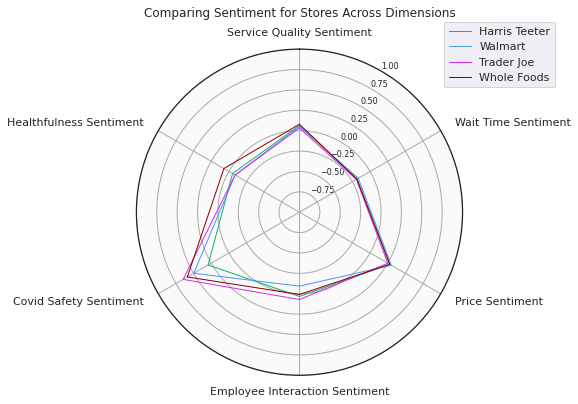

In [ ]:
# Each factor in the radar chart.
labels = ['Service Quality Sentiment', 'Wait Time Sentiment','Price Sentiment','Employee Interaction Sentiment','Covid Safety Sentiment','Healthfulness Sentiment']

# Number of variables
num_vars = len(labels)

# Split the circle into even parts and save the angles
# so we know where to put each axis.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
angles += angles[:1]

# ax = plt.subplot(polar=True)
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Helper function to plot each car on the radar chart.
def add_to_radar(store, color):
  values = df_agg.loc[store].tolist()
  values += values[:1]
  ax.plot(angles, values, color=color, linewidth=1, label=store)
  #ax.fill(angles, values, color=color, alpha=0.25)

# Add each car to the chart.
add_to_radar('Harris Teeter', '#1aaf6c')
add_to_radar('Walmart', '#429bf4')
add_to_radar('Trader Joe', '#d42cea')
add_to_radar('Whole Foods', '#8B0000')

# Fix axis to go in the right order and start at 12 o'clock.
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label.
ax.set_thetagrids(np.degrees(angles), labels)

# Go through labels and adjust alignment based on where
# it is in the circle.
for label, angle in zip(ax.get_xticklabels(), angles):
  if angle in (0, np.pi):
    label.set_horizontalalignment('center')
  elif 0 < angle < np.pi:
    label.set_horizontalalignment('left')
  else:
    label.set_horizontalalignment('right')

# Ensure radar goes from -1 to 1
ax.set_ylim(-1, 1)

# Set position of y-labels to be in the middle
# of the first two axes.
ax.set_rlabel_position(180 / num_vars)

# Change the color of the tick labels.
ax.tick_params(colors='#222222')
# Make the y-axis (0-100) labels smaller.
ax.tick_params(axis='y', labelsize=8)
# Change the color of the circular gridlines.
ax.grid(color='#AAAAAA')
# Change the color of the outermost gridline (the spine).
ax.spines['polar'].set_color('#222222')
# Change the background color inside the circle itself.
ax.set_facecolor('#FAFAFA')

# Add title.
ax.set_title('Comparing Sentiment for Stores Across Dimensions', y=1.08)

# Add a legend as well.
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

In the above radar chart you can see that Harris Teeter stands out in that it has the lowest sentiment regarding COVID safety measures and is fairly low concerning healthiness of its products. 

More significantly, it doesn't stand out in any dimension. This paves the way for HT to implement managerial and product changes to improve customer satisfaction.

## Comparative Sentiment Analysis

Next, we look further into each category that our Radar Chart displayed. Each lollipop chart below displays the difference between sentiments across companies for each topic. 

Employee Interactions



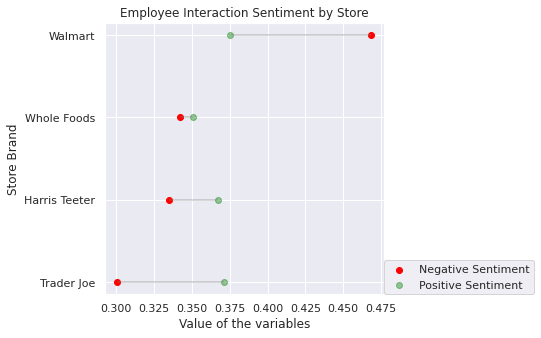

In [ ]:
# Create a dataframe
value_neg=df_pol['agg_neg_employee']
value_pos=df_pol['agg_pos_employee']
df = pd.DataFrame({'Store':df_pol.index, 'Negative Value':value_neg , 'Positive Value':value_pos })
 
# Reorder it following the values of the first value:
ordered_df = df_pol.sort_values(by='agg_neg_employee')
my_range=range(1,len(df.index)+1)
 
# The horizontal plot is made using the hline function
plt.hlines(y=my_range, xmin=ordered_df['agg_neg_employee'], xmax=ordered_df['agg_pos_employee'], color='grey', alpha=0.4)
plt.scatter(ordered_df['agg_neg_employee'], my_range, color='red', alpha=1, label='Negative Sentiment')
plt.scatter(ordered_df['agg_pos_employee'], my_range, color='green', alpha=0.4 , label='Positive Sentiment')
plt.legend(loc=(1,0))
 
# Add title and axis names
plt.yticks(my_range, ordered_df.index)
plt.title("Employee Interaction Sentiment by Store", loc='center')
plt.xlabel('Value of the variables')
plt.ylabel('Store Brand')

# Show the graph
plt.show()

Wait Time

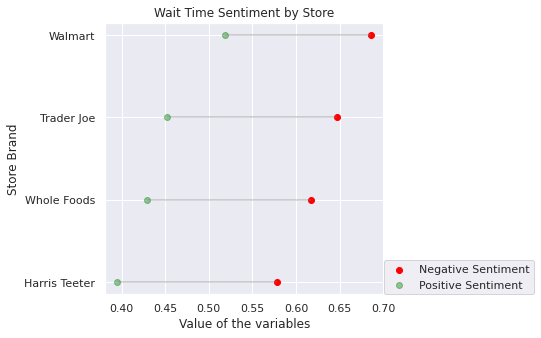

In [ ]:
# Create a dataframe
vneg = 'agg_neg_wait'
vpos = 'agg_pos_wait'
value_neg=df_pol[vneg]
value_pos=df_pol[vpos]
df = pd.DataFrame({'Store':df_pol.index, 'Negative Value':value_neg , 'Positive Value':value_pos })
 
# Reorder it following the values of the first value:
ordered_df = df_pol.sort_values(by=vneg)
my_range=range(1,len(df.index)+1)
 
# The horizontal plot is made using the hline function
plt.hlines(y=my_range, xmin=ordered_df[vneg], xmax=ordered_df[vpos], color='grey', alpha=0.4)
plt.scatter(ordered_df[vneg], my_range, color='red', alpha=1, label='Negative Sentiment')
plt.scatter(ordered_df[vpos], my_range, color='green', alpha=0.4 , label='Positive Sentiment')
plt.legend(loc = (1,0))
 
# Add title and axis names
plt.yticks(my_range, ordered_df.index)
plt.title("Wait Time Sentiment by Store", loc='center')
plt.xlabel('Value of the variables')
plt.ylabel('Store Brand')

# Show the graph
plt.show()

Price Sentiment

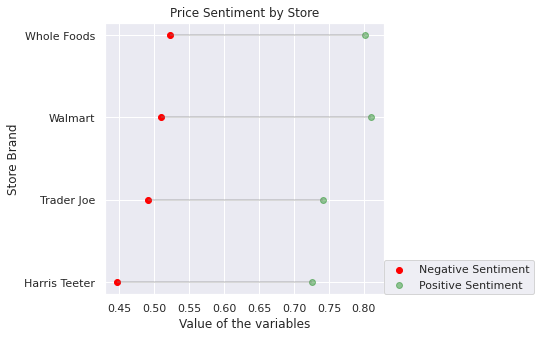

In [ ]:
# Create a dataframe
vneg = 'agg_neg_price'
vpos = 'agg_pos_price'
value_neg=df_pol[vneg]
value_pos=df_pol[vpos]
df = pd.DataFrame({'Store':df_pol.index, 'Negative Value':value_neg , 'Positive Value':value_pos })
 
# Reorder it following the values of the first value:
ordered_df = df_pol.sort_values(by=vneg)
my_range=range(1,len(df.index)+1)
 
# The horizontal plot is made using the hline function
plt.hlines(y=my_range, xmin=ordered_df[vneg], xmax=ordered_df[vpos], color='grey', alpha=0.4)
plt.scatter(ordered_df[vneg], my_range, color='red', alpha=1, label='Negative Sentiment')
plt.scatter(ordered_df[vpos], my_range, color='green', alpha=0.4 , label='Positive Sentiment')
plt.legend(loc = (1,0))
 
# Add title and axis names
plt.yticks(my_range, ordered_df.index)
plt.title("Price Sentiment by Store", loc='center')
plt.xlabel('Value of the variables')
plt.ylabel('Store Brand')

# Show the graph
plt.show()

Service Sentiment

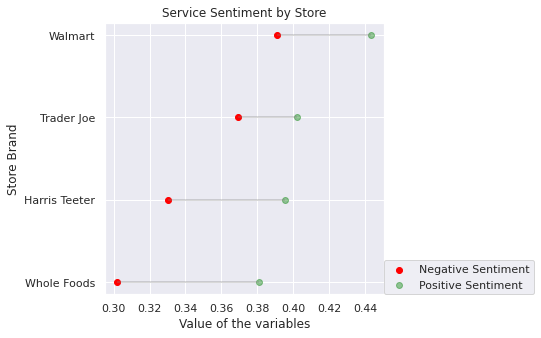

In [ ]:
# Create a dataframe
vneg = 'agg_neg_service'
vpos = 'agg_pos_service'
value_neg=df_pol[vneg]
value_pos=df_pol[vpos]
df = pd.DataFrame({'Store':df_pol.index, 'Negative Value':value_neg , 'Positive Value':value_pos })
 
# Reorder it following the values of the first value:
ordered_df = df_pol.sort_values(by=vneg)
my_range=range(1,len(df.index)+1)
 
# The horizontal plot is made using the hline function
plt.hlines(y=my_range, xmin=ordered_df[vneg], xmax=ordered_df[vpos], color='grey', alpha=0.4)
plt.scatter(ordered_df[vneg], my_range, color='red', alpha=1, label='Negative Sentiment')
plt.scatter(ordered_df[vpos], my_range, color='green', alpha=0.4 , label='Positive Sentiment')
plt.legend(loc = (1,0))
 
# Add title and axis names
plt.yticks(my_range, ordered_df.index)
plt.title("Service Sentiment by Store", loc='center')
plt.xlabel('Value of the variables')
plt.ylabel('Store Brand')

# Show the graph
plt.show()

Healthifulness Sentiment

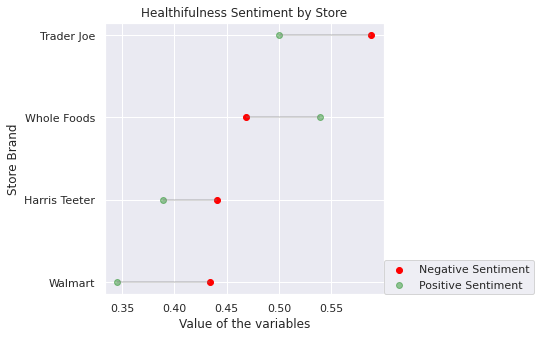

In [ ]:
# Create a dataframe
vneg = 'agg_neg_health'
vpos = 'agg_pos_health'
value_neg=df_pol[vneg]
value_pos=df_pol[vpos]
df = pd.DataFrame({'Store':df_pol.index, 'Negative Value':value_neg , 'Positive Value':value_pos })
 
# Reorder it following the values of the first value:
ordered_df = df_pol.sort_values(by=vneg)
my_range=range(1,len(df.index)+1)
 
# The horizontal plot is made using the hline function
plt.hlines(y=my_range, xmin=ordered_df[vneg], xmax=ordered_df[vpos], color='grey', alpha=0.4)
plt.scatter(ordered_df[vneg], my_range, color='red', alpha=1, label='Negative Sentiment')
plt.scatter(ordered_df[vpos], my_range, color='green', alpha=0.4 , label='Positive Sentiment')
plt.legend(loc = (1,0))
 
# Add title and axis names
plt.yticks(my_range, ordered_df.index)
plt.title("Healthifulness Sentiment by Store", loc='center')
plt.xlabel('Value of the variables')
plt.ylabel('Store Brand')

# Show the graph
plt.show()

## Principal Component Analysis

Lastly, we provide Principal Component Analysis for another visualization of each topic/dimension and where companies lie within those dimensions respectively.

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


PCADecomposition(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f9321ccef50>,
                 color=None, colormap='RdBu', features=None, proj_dim=2,
                 proj_features=True, random_state=None, scale=True)

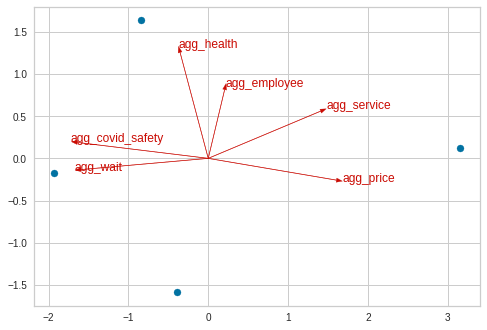

In [ ]:
from yellowbrick.datasets import load_credit
from yellowbrick.features.pca import PCADecomposition
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 


df_pca = pd.DataFrame(preprocessing.normalize(df_agg), columns=df_agg.columns)

X = df_pca
y = df_pca['agg_price']


visualizer = PCADecomposition(scale=True, proj_features = True, color = None)
visualizer.fit_transform(X, y)
visualizer

# Recommendation

**Problem**: Harris Teeter lacking COVID-19 safety sentiment 

**Recommendation 1:** Do a better job ensuring employees are following CDC recommended guidelines for essential workers: 
 - Wearing masks at all times while working
 - Frequently washing their hands
 - Regularly sanitizing the store

---

**Probelm** Compared to Trader Joe’s and Whole Foods, Harris Teeter does not have many healthy, unique food options. 

**Recommendation 2:** 
- Roll out a product line similar to Trader Joe's and Whole Foods with organic and healthy branding. 
- Release seasonal products to vary popularity and spread 

---
**Problem** Harris Teeter's employee engagement was not mentioned as much as it was in other companies' tweets

**Recommendation 3:** Strategies to improve employee engagement include engagement, personal management, and achievement recognition

- Non-monetary recognition can improve employee performance up to 43%1
Provide resources to maintain well-being (mental, physical, social)
- Provide resources to maintain well-being (mental, physical, social)

